# Importing relevant functions and libraries

In [60]:
%run "Reusable_Functions.ipynb"

# Motivation to using Autoencoders

Autoencoder are good at:
- **dimensionality reduction** for data visualization
- **data denoising** for robust feature learning

Thus the motivation is to use Z-space of autoencoders as Path Descriptors of coupler curves.

# Import Data

In [40]:
# Import data offline
cplr, mech = import_DB_offline()
print(cplr.shape)
print(mech.shape)

(1902, 100, 3)
(1902, 11, 3)


In [41]:
# Import data on Google CoLab
cplr, mech = import_DB_colab()
print(cplr.shape)
print(mech.shape)

ModuleNotFoundError: No module named 'google.colab'

In [42]:
# Renormalize DB from range [-1,1] to range [0,1] 
n_cplr=cplr/2+.5
n_mech=mech/2+.5

# Splitting the database in Train/Test dataset

In [53]:
x= n_cplr

# Split data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, _, _ = train_test_split(x, x, test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)

(1521, 100, 3)
(381, 100, 3)


# 1. Effect of activation func: Sigmoid vs RELU vs LeakyRELU

First we try to find which activation function might perform better for our usecase i.e. describing 3D coupler paths. Each model is trained 10 times for upto 1000 epochs. Training ends when the validation loss fails to decerease for 10 epochs.  The training stastics and the best fit model results are reported.

## 1.1 Autoencoder Sigmoid activation

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00121: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00100: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00142: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00111: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00143: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00166: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00286: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00622: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00147: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00051: early stopping
*************************************************

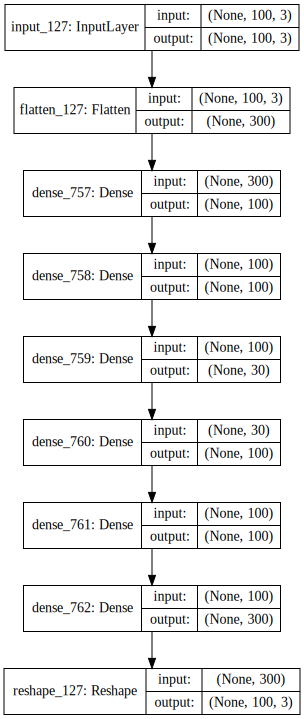

Training loss: 0.0259
Validation loss: 0.0267


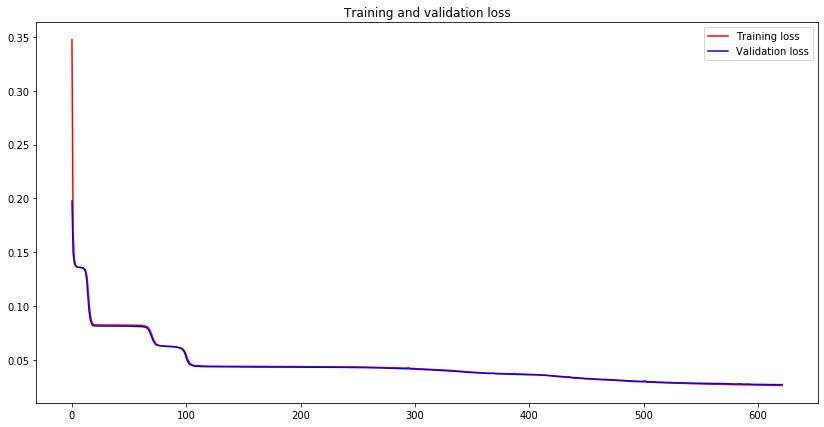

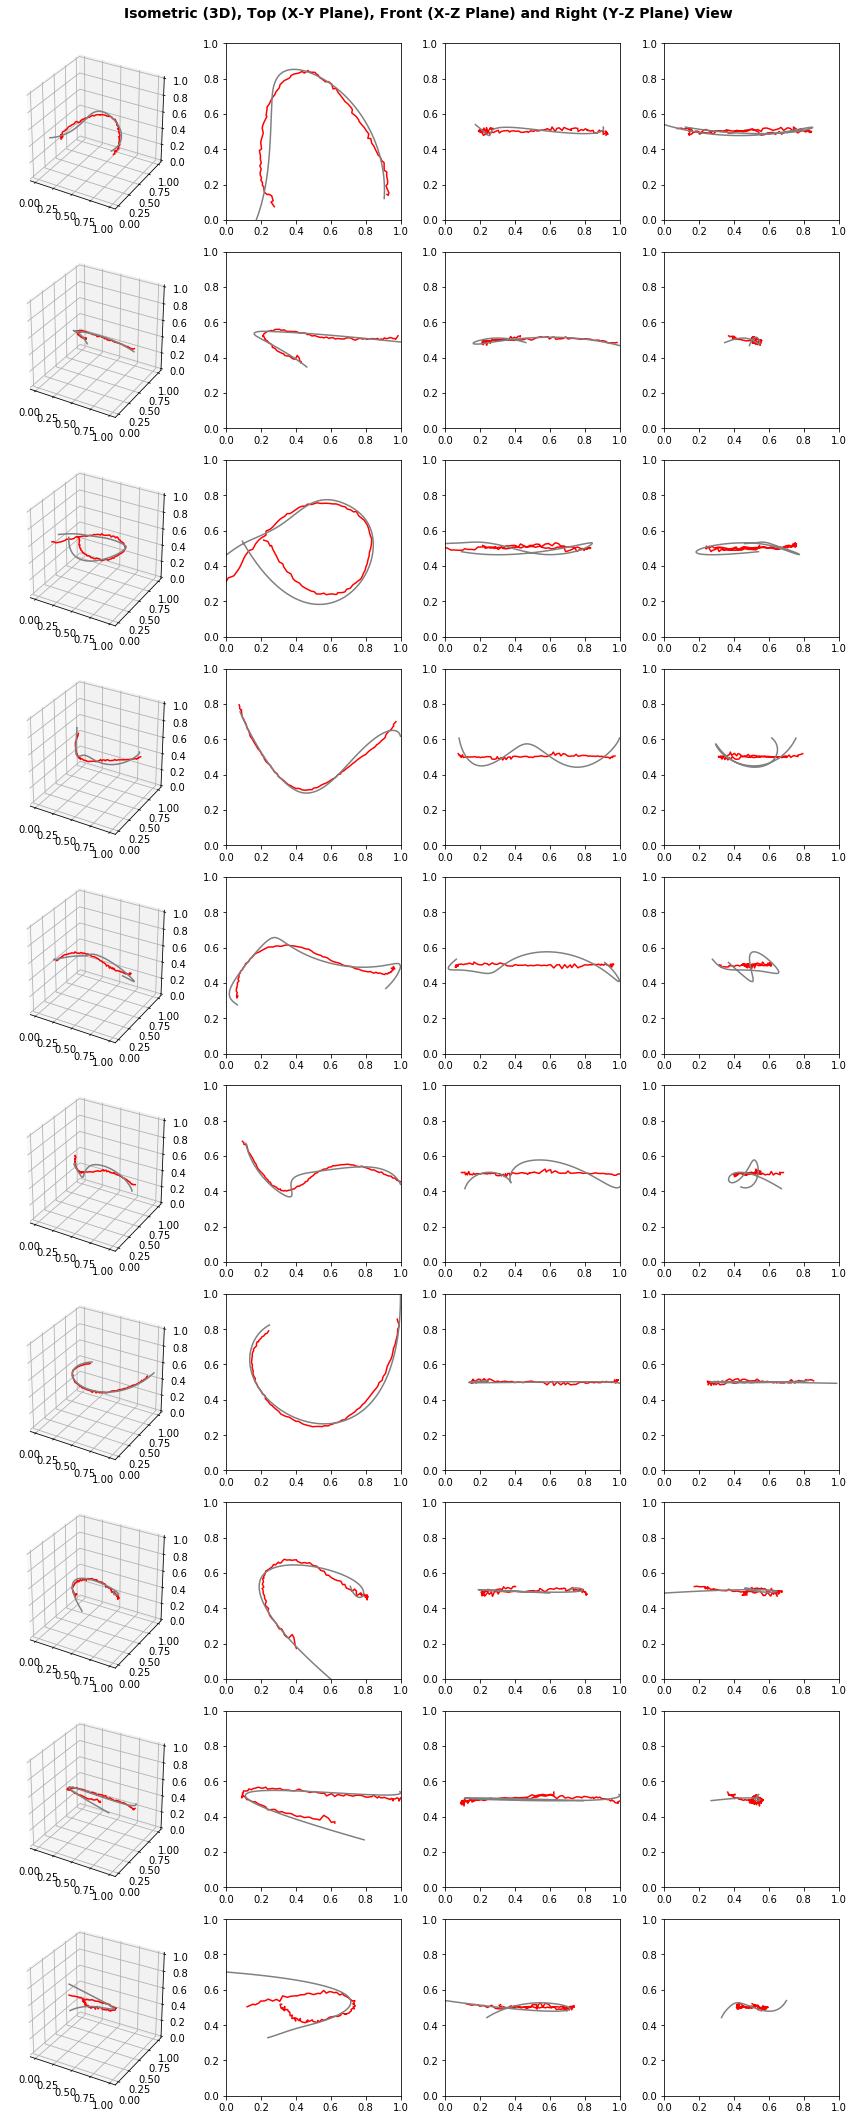

In [61]:
AE,E,train_data =AE_analysis(aeSig, 10, x_train, x_test, filename='Sig')
visualize_AE(AE, train_data, x_test)

# Tanh

## 1.2 Autoencoder RELU activation

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00152: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00105: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00096: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00167: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00073: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00075: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00080: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00083: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00113: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00085: early stopping
*************************************************

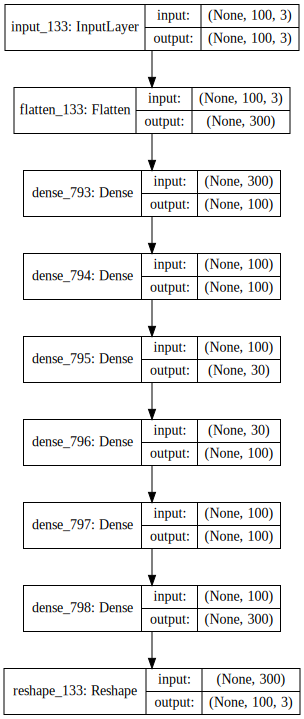

Training loss: 0.0203
Validation loss: 0.0212


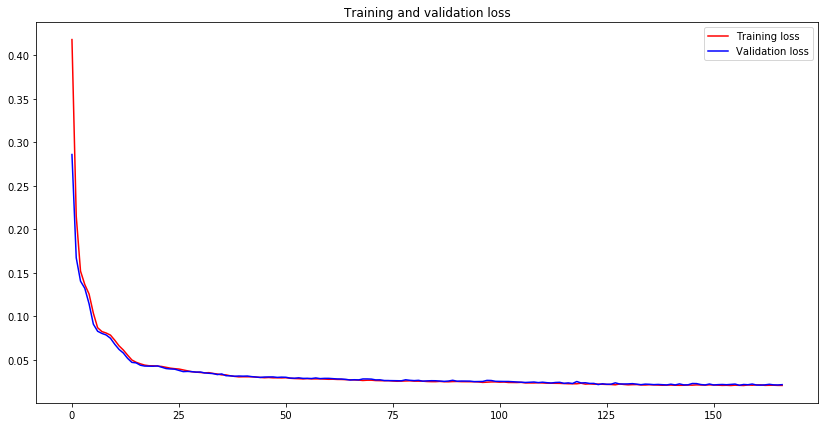

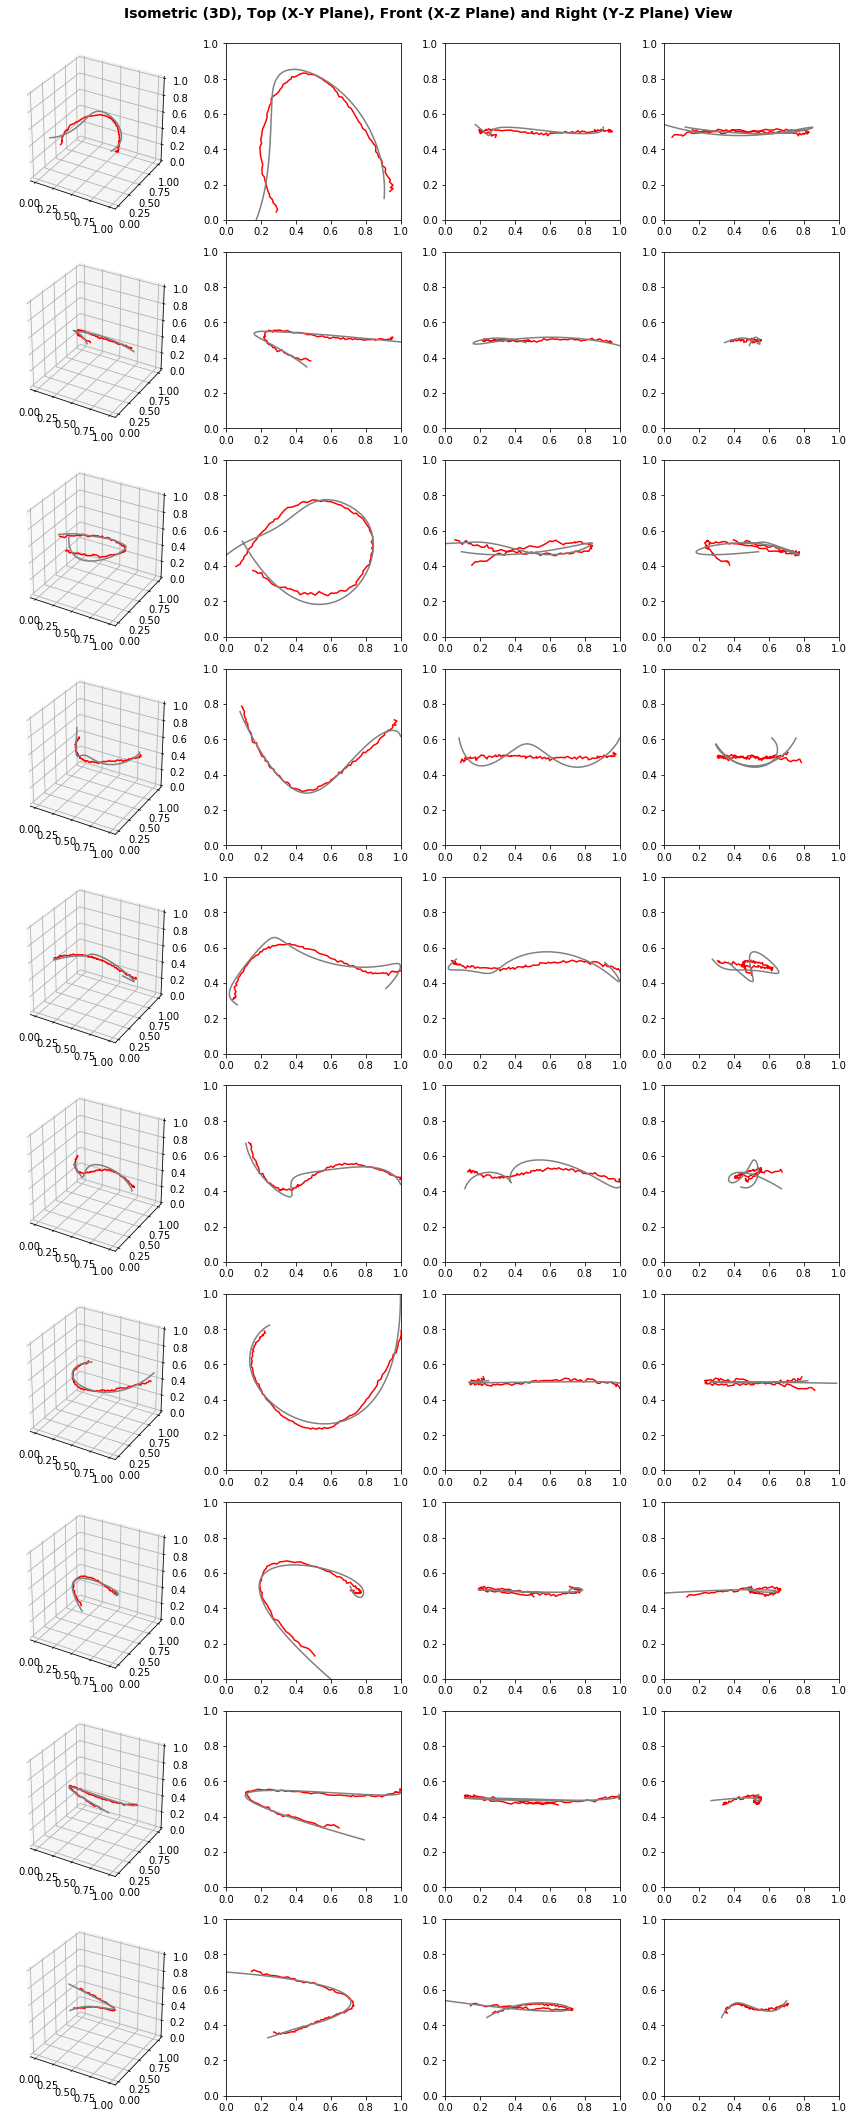

In [62]:
AE,E,train_data =AE_analysis(aeRELU, 10, x_train, x_test, filename='RELU')
visualize_AE(AE, train_data, x_test)

## 1.3 Autoencoder LeakyRELU activation

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00132: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00083: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00108: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00087: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00113: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00096: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00082: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00112: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00077: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00068: early stopping
*************************************************

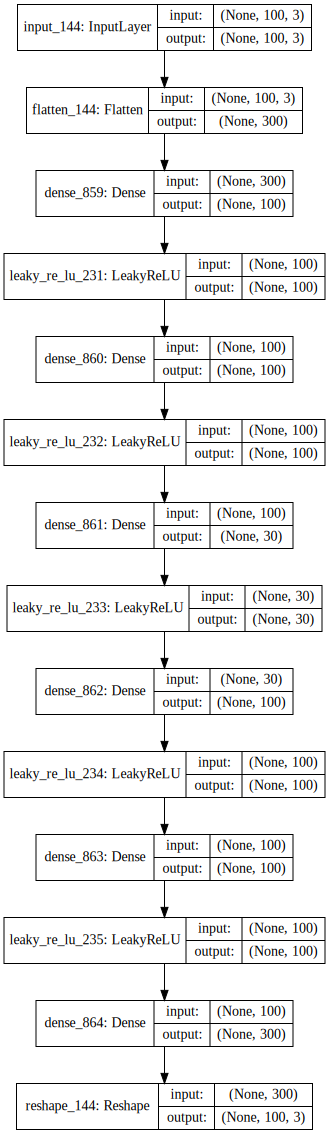

Training loss: 0.0209
Validation loss: 0.0218


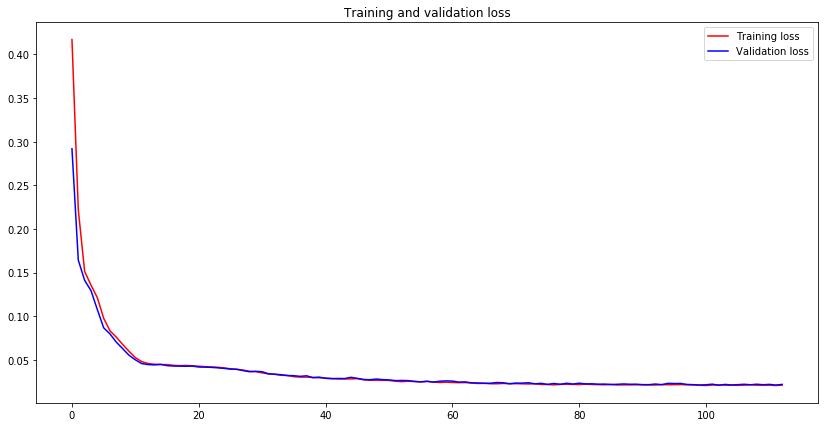

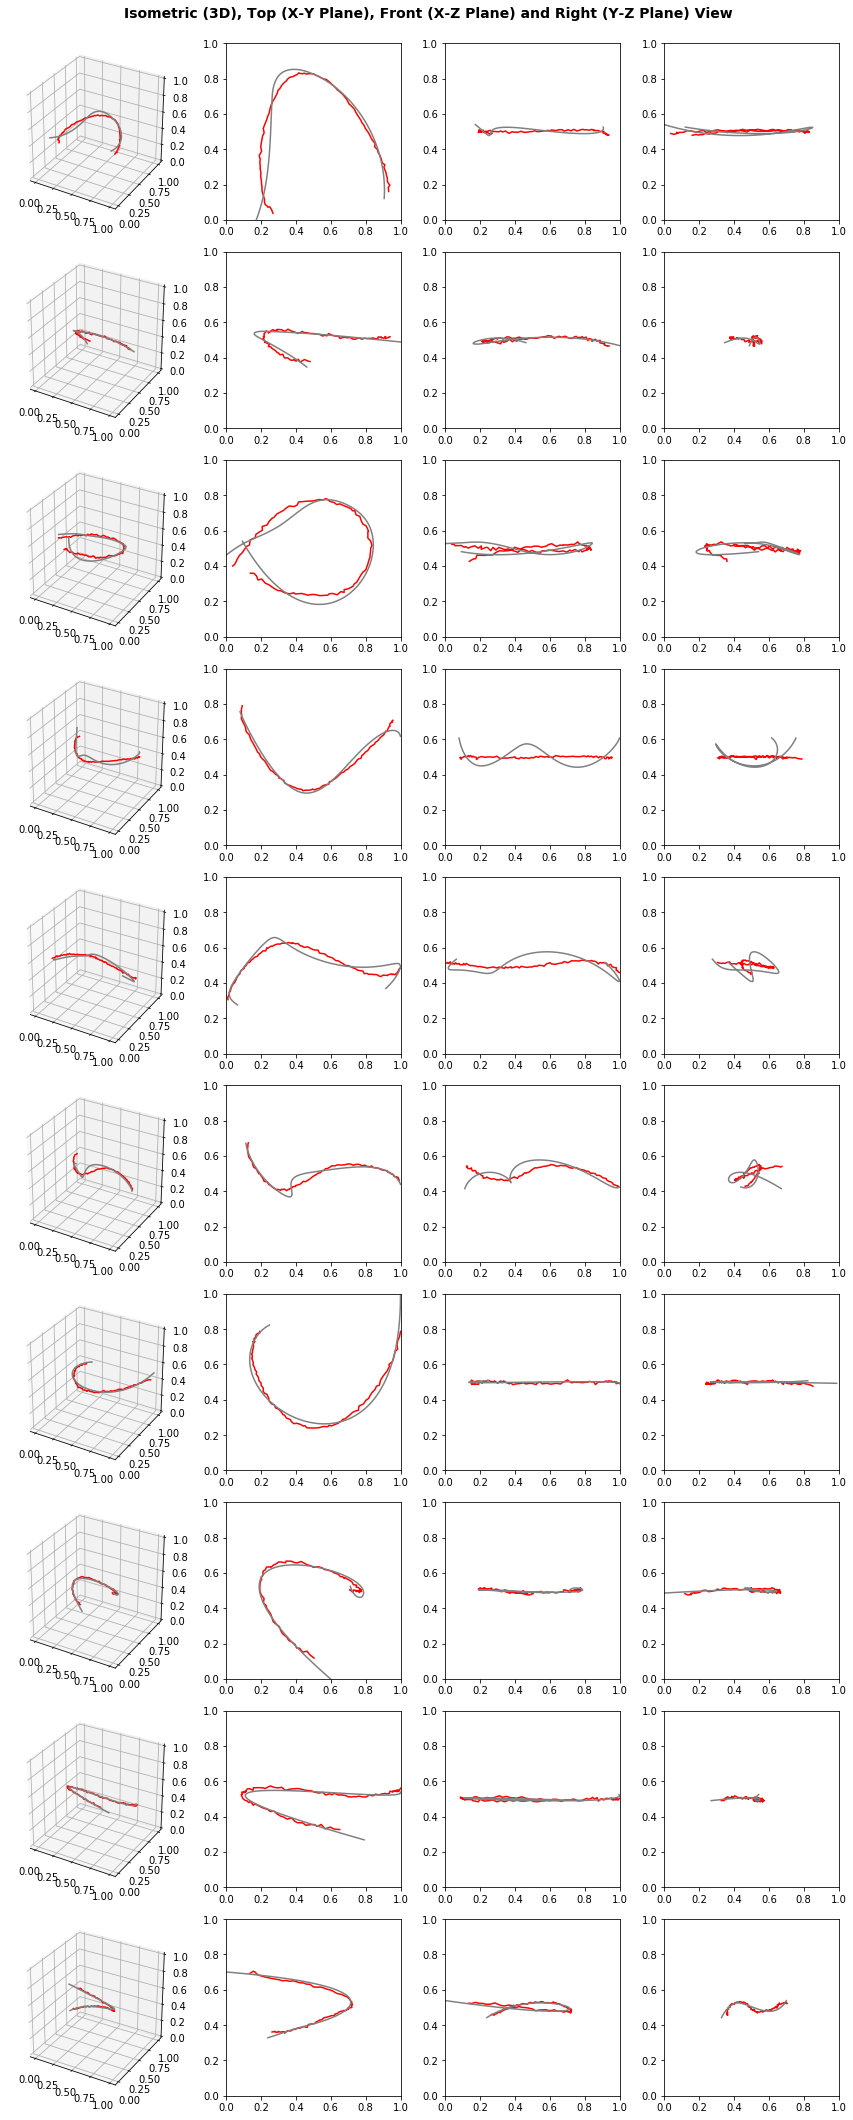

In [63]:
AE,E,train_data =AE_analysis(aeLRELU, 10, x_train, x_test, filename='LRELU')
visualize_AE(AE, train_data, x_test)

# 2. Effect of Latent space Z=2,3,10,15,30,60,300 on Dense Auto-Encoders

The nodes in Z-space determines the dimensionity reduction carried out by an auto-encoder. However, if the z-space is too small, the accuracy of reconstruction is adversely affected. Thus, we carry an emperical analysis to find the best accuracy-dimentionality tradeoff.

## 2.1 Autoencoder Z=2

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00197: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00081: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00094: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00280: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00247: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00035: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00138: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00171: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00109: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00211: early stopping
[0.12, 0.1332, 0.1372, 0.1083, 0.1178, 0.2083, 0.

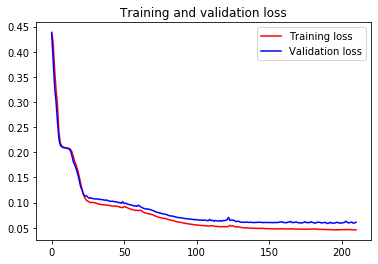

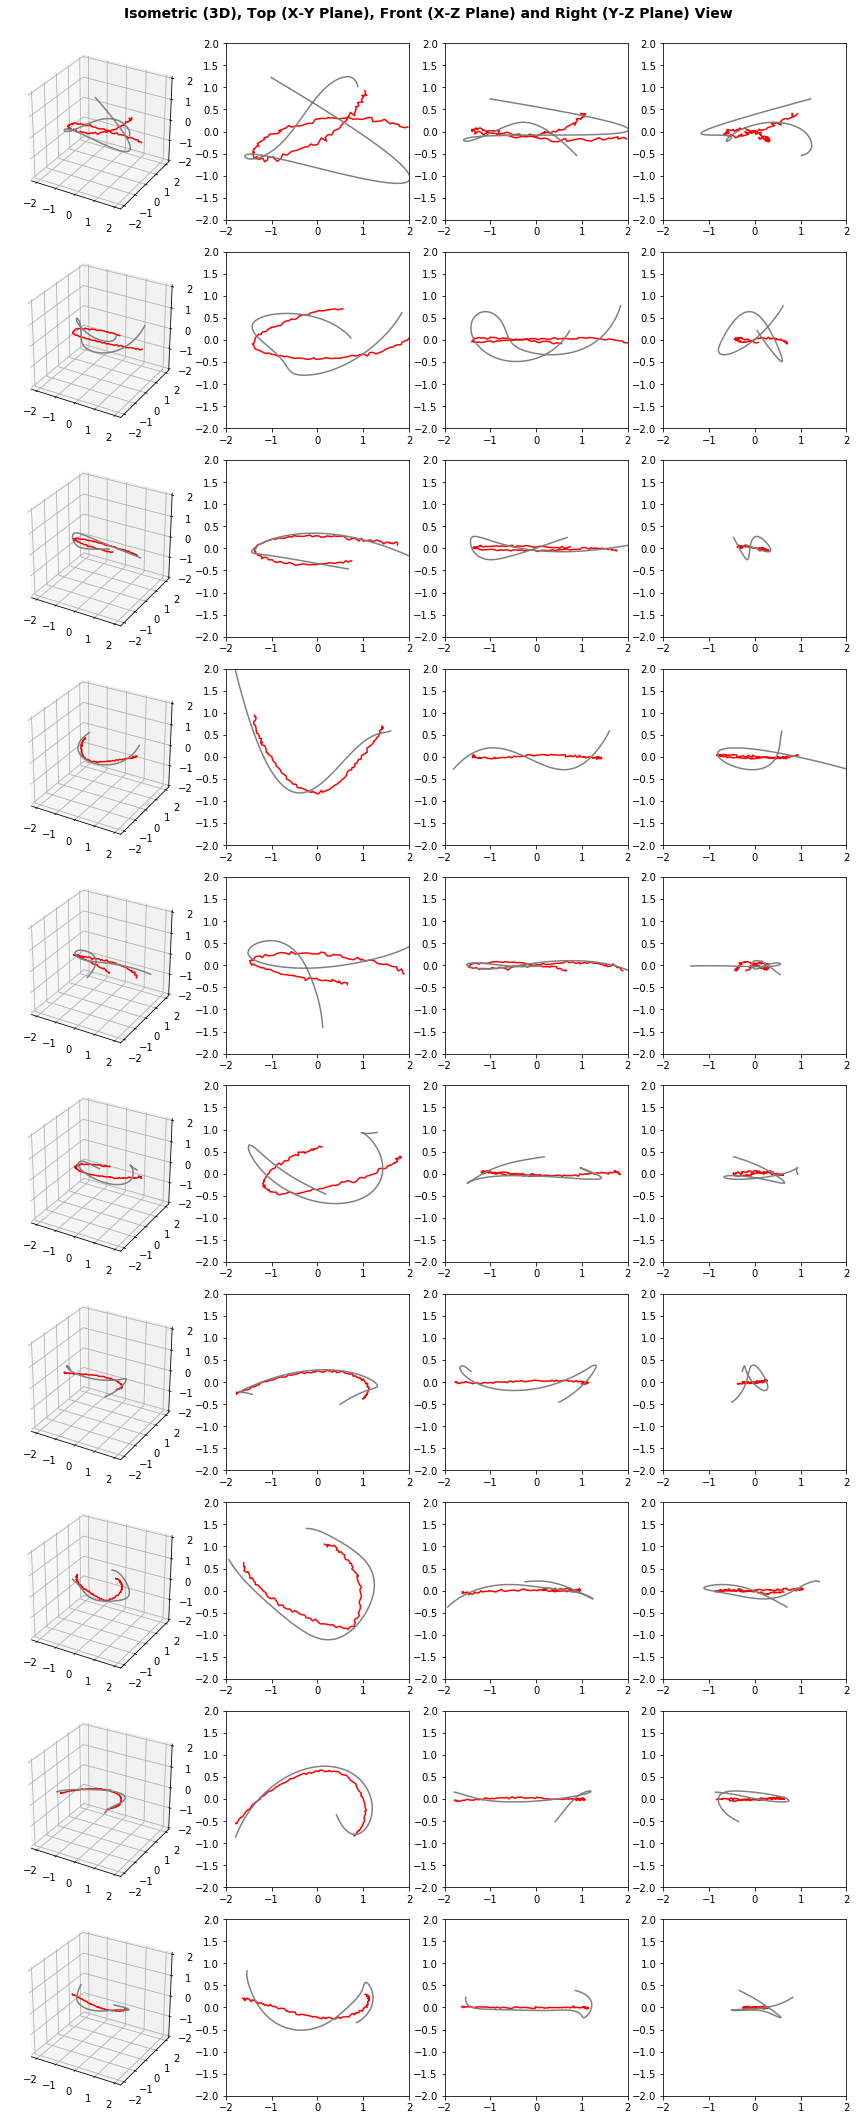

In [0]:
def autoEncoderZ2():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(100, activation='relu')(x)
    x=Dense(30, activation='relu')(x)
    x=Dense(20, activation='relu')(x)
    x=Dense(10, activation='relu')(x)
    x=Dense(5, activation='relu')(x)
    encoded=Dense(2, activation='relu')(x)
    #encoded=Dense(10, activation='relu',activity_regularizer=regularizers.l1(10e-5))(x)

    # Decoding
    x=Dense(5, activation='relu')(encoded)
    x=Dense(10, activation='relu')(x)
    x=Dense(20, activation='relu')(x)
    x=Dense(30, activation='relu')(x)
    x=Dense(100, activation='relu')(x)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderZ2, 10, x_train, x_test, filename='Z2')
visualize_AE(AE, train_data, x_test)

## 2.2 Autoencoder Z=3

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00262: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00184: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00244: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00154: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00331: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00177: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00260: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00270: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00198: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00254: early stopping
[0.051, 0.0585, 0.0458, 0.0541, 0.0393, 0.0645, 0

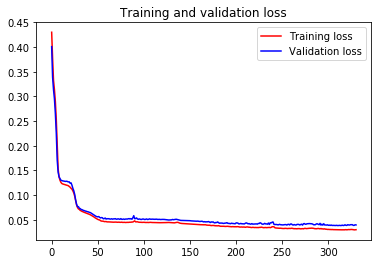

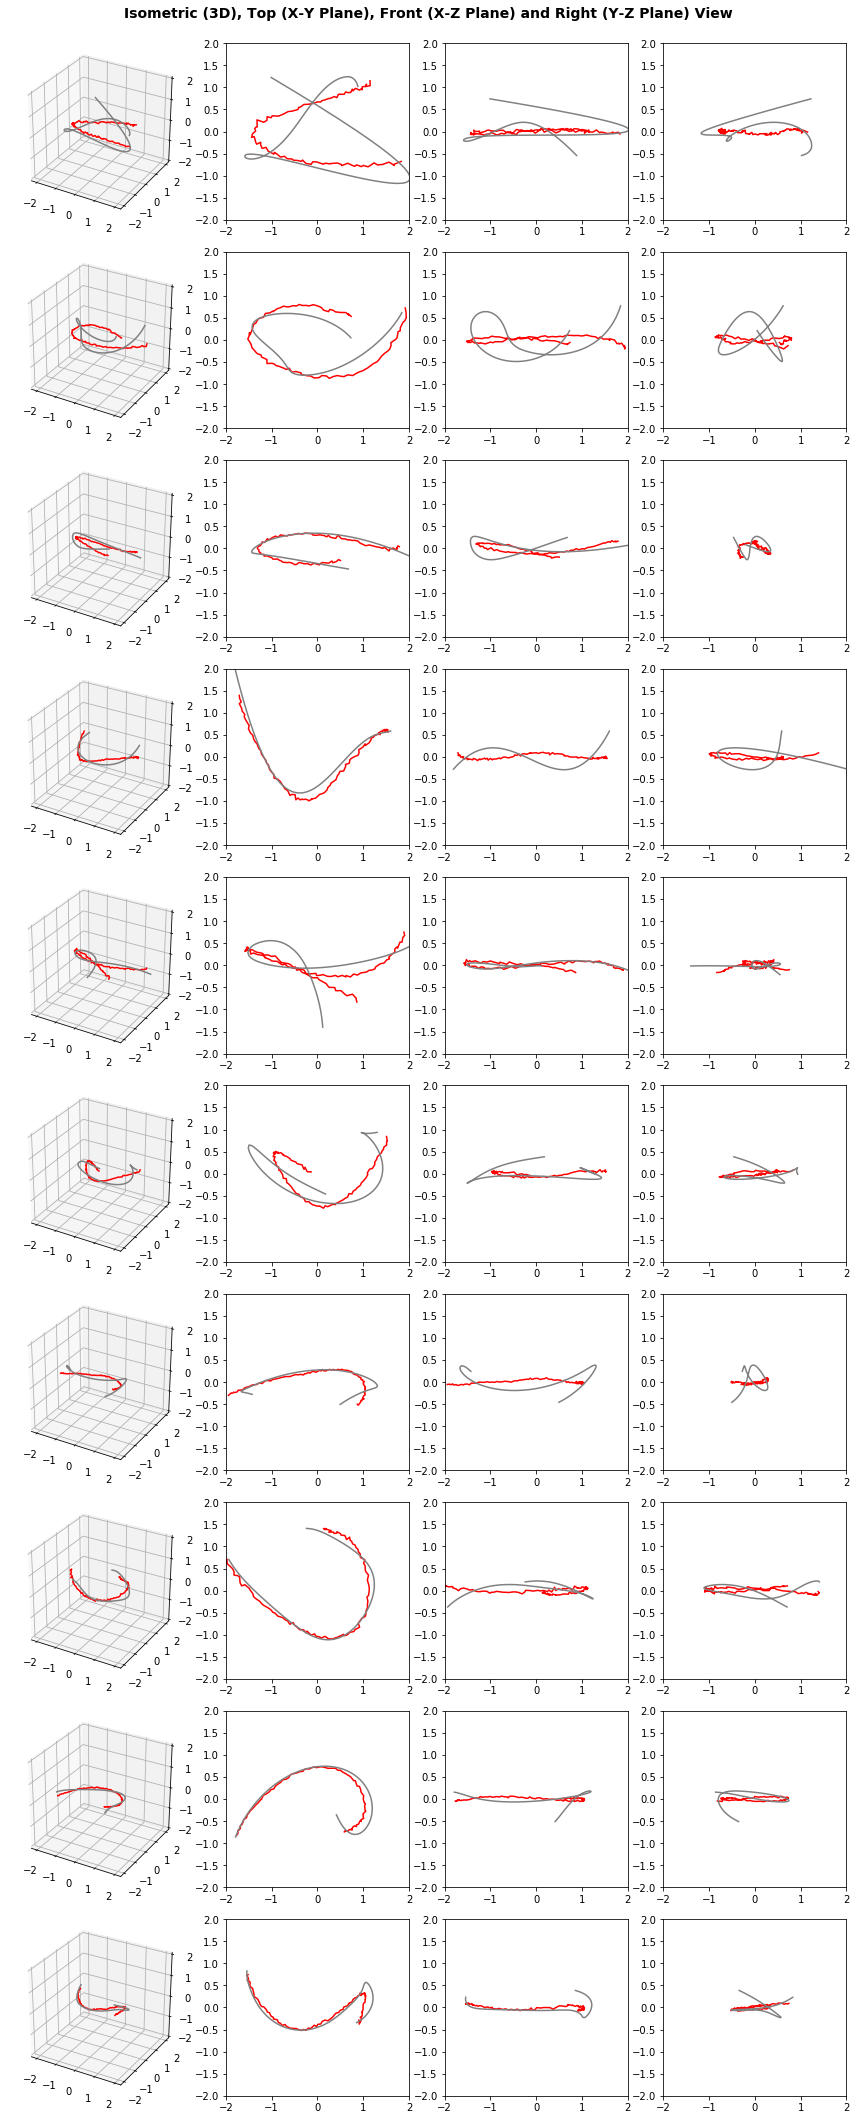

In [0]:
def autoEncoderZ3():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(100, activation='relu')(x)
    x=Dense(30, activation='relu')(x)
    x=Dense(20, activation='relu')(x)
    x=Dense(10, activation='relu')(x)
    encoded=Dense(3, activation='relu')(x)
    #encoded=Dense(10, activation='relu',activity_regularizer=regularizers.l1(10e-5))(x)

    # Decoding
    x=Dense(10, activation='relu')(encoded)
    x=Dense(20, activation='relu')(x)
    x=Dense(30, activation='relu')(x)
    x=Dense(100, activation='relu')(x)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderZ3, 10, x_train, x_test, filename='Z3')
visualize_AE(AE, train_data, x_test)

## 2.3 Autoencoder Z=10

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00172: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00115: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00148: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00138: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00222: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00150: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00146: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00203: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00215: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00166: early stopping
[0.019, 0.0198, 0.0185, 0.0187, 0.0195, 0.02, 0.0

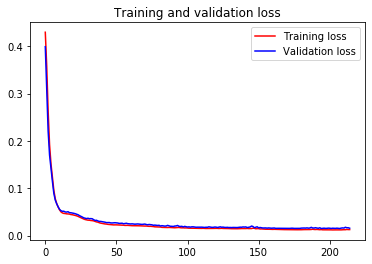

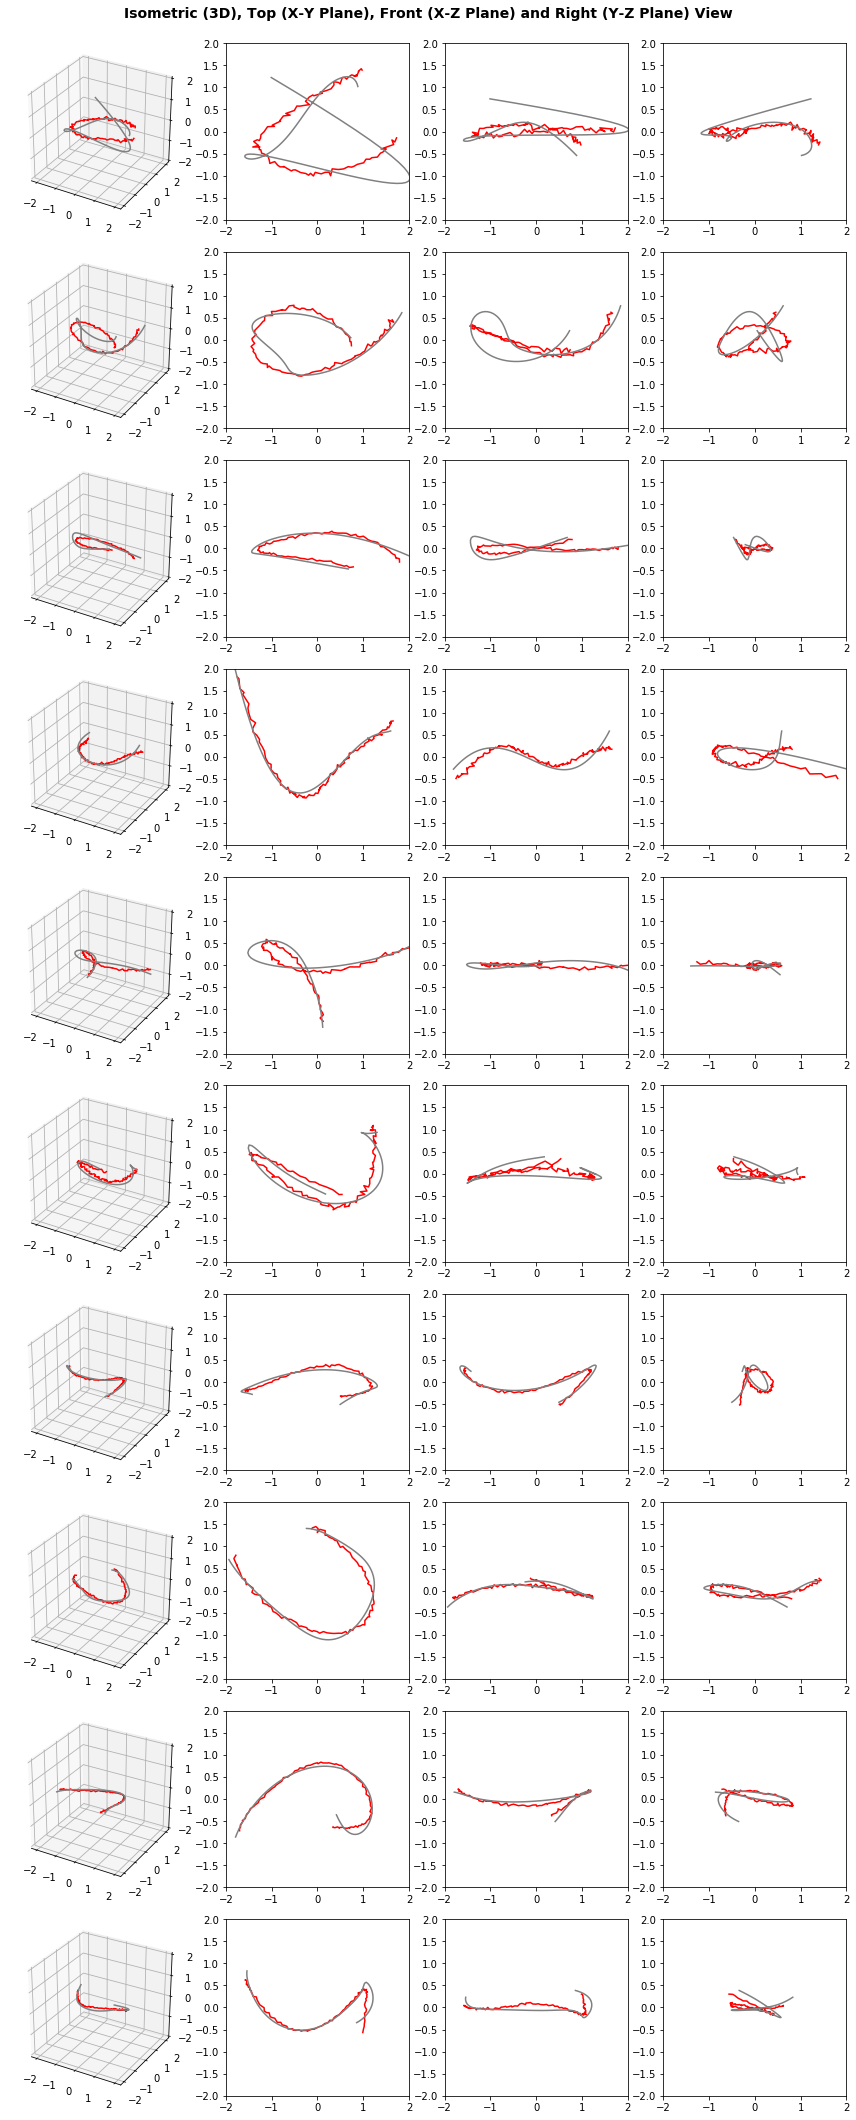

In [0]:
def autoEncoderZ10():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(100, activation='relu')(x)
    x=Dense(50, activation='relu')(x)
    x=Dense(25, activation='relu')(x)
    encoded=Dense(10, activation='relu')(x)

    # Decoding
    x=Dense(25, activation='relu')(encoded)
    x=Dense(50, activation='relu')(x)
    x=Dense(100, activation='relu')(x)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderZ10, 10, x_train, x_test, filename='Z10')
visualize_AE(AE, train_data, x_test)

## 2.4 Autoencoder Z=15

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00194: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00292: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00319: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00151: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00175: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00161: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00325: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00202: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00247: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00298: early stopping
[0.013, 0.012, 0.0107, 0.0149, 0.0144, 0.0151, 0.

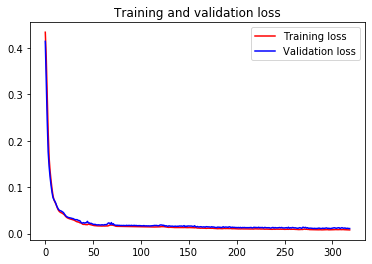

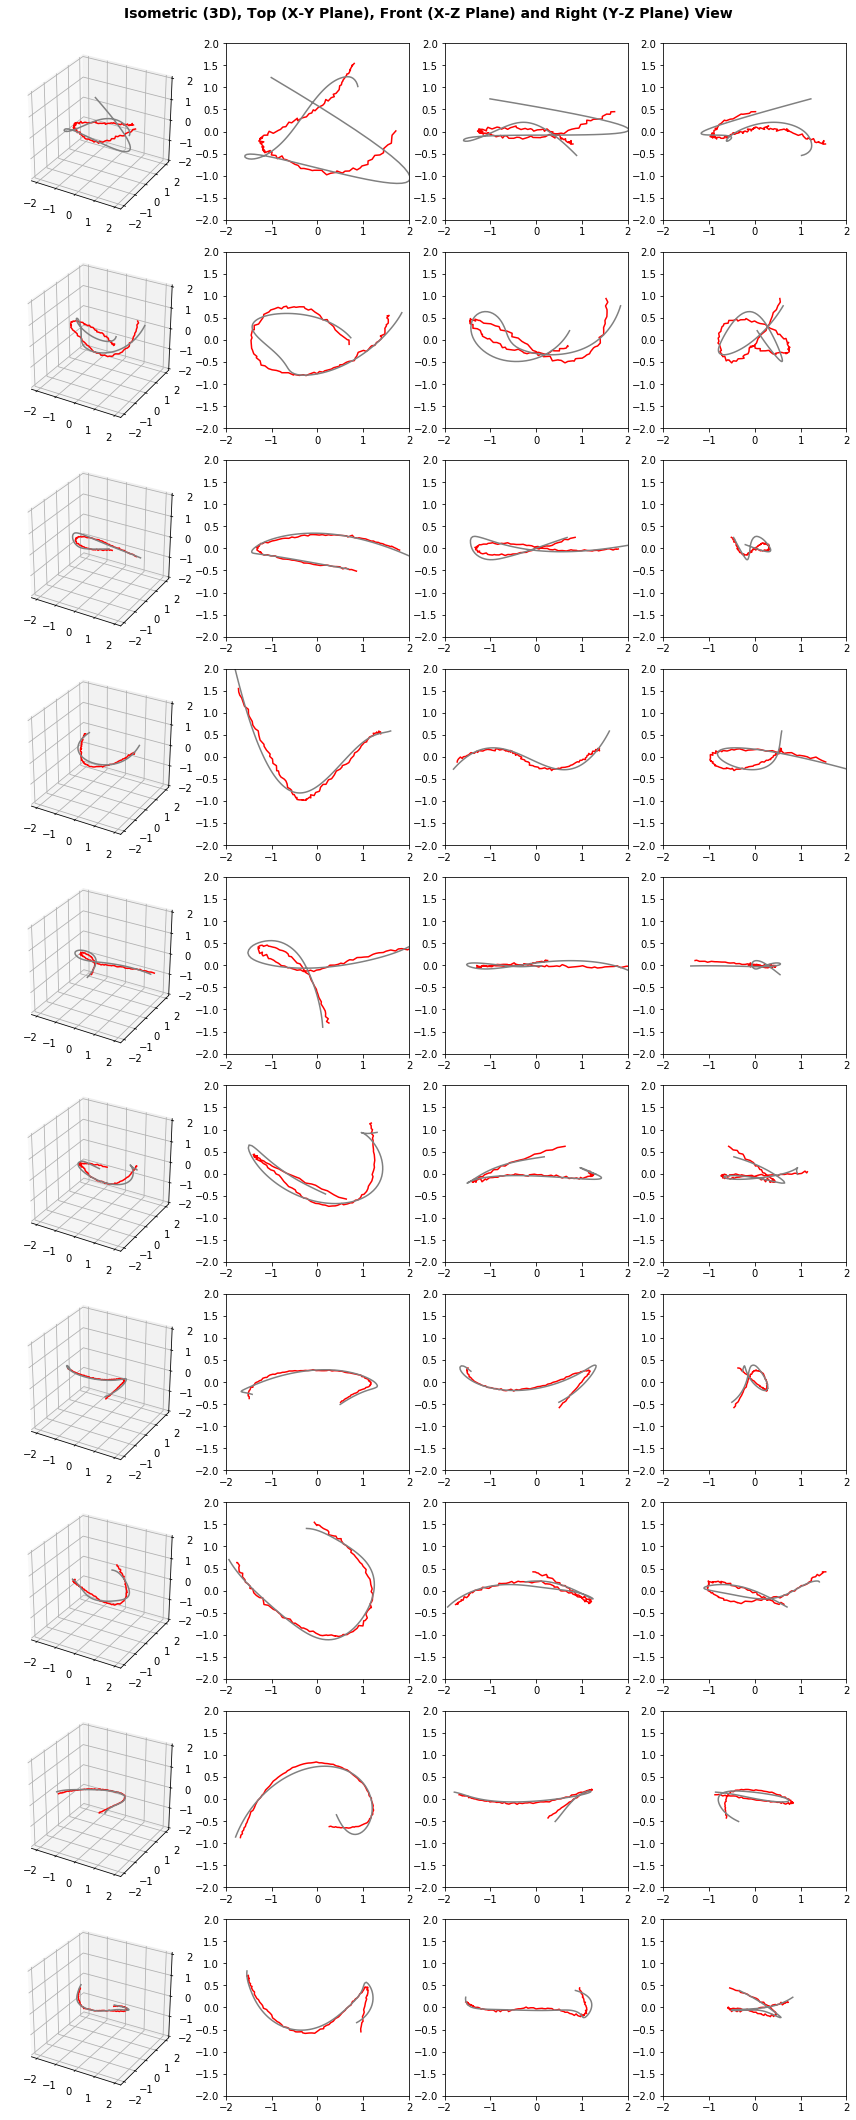

In [0]:
def autoEncoderZ15():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(100, activation='relu')(x)
    x=Dense(60, activation='relu')(x)
    x=Dense(30, activation='relu')(x)
    encoded=Dense(15, activation='relu')(x)

    # Decoding
    x=Dense(30, activation='relu')(encoded)
    x=Dense(60, activation='relu')(x)
    x=Dense(100, activation='relu')(x)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderZ15, 10, x_train, x_test, filename='Z15')
visualize_AE(AE, train_data, x_test)

## 2.5 Autoencoder Z=30

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00210: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00159: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00219: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00156: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00173: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00138: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00149: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00235: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00163: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00212: early stopping
[0.0053, 0.0068, 0.0052, 0.0052, 0.0063, 0.0068, 

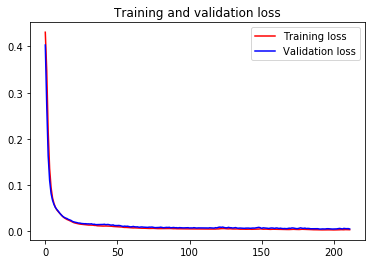

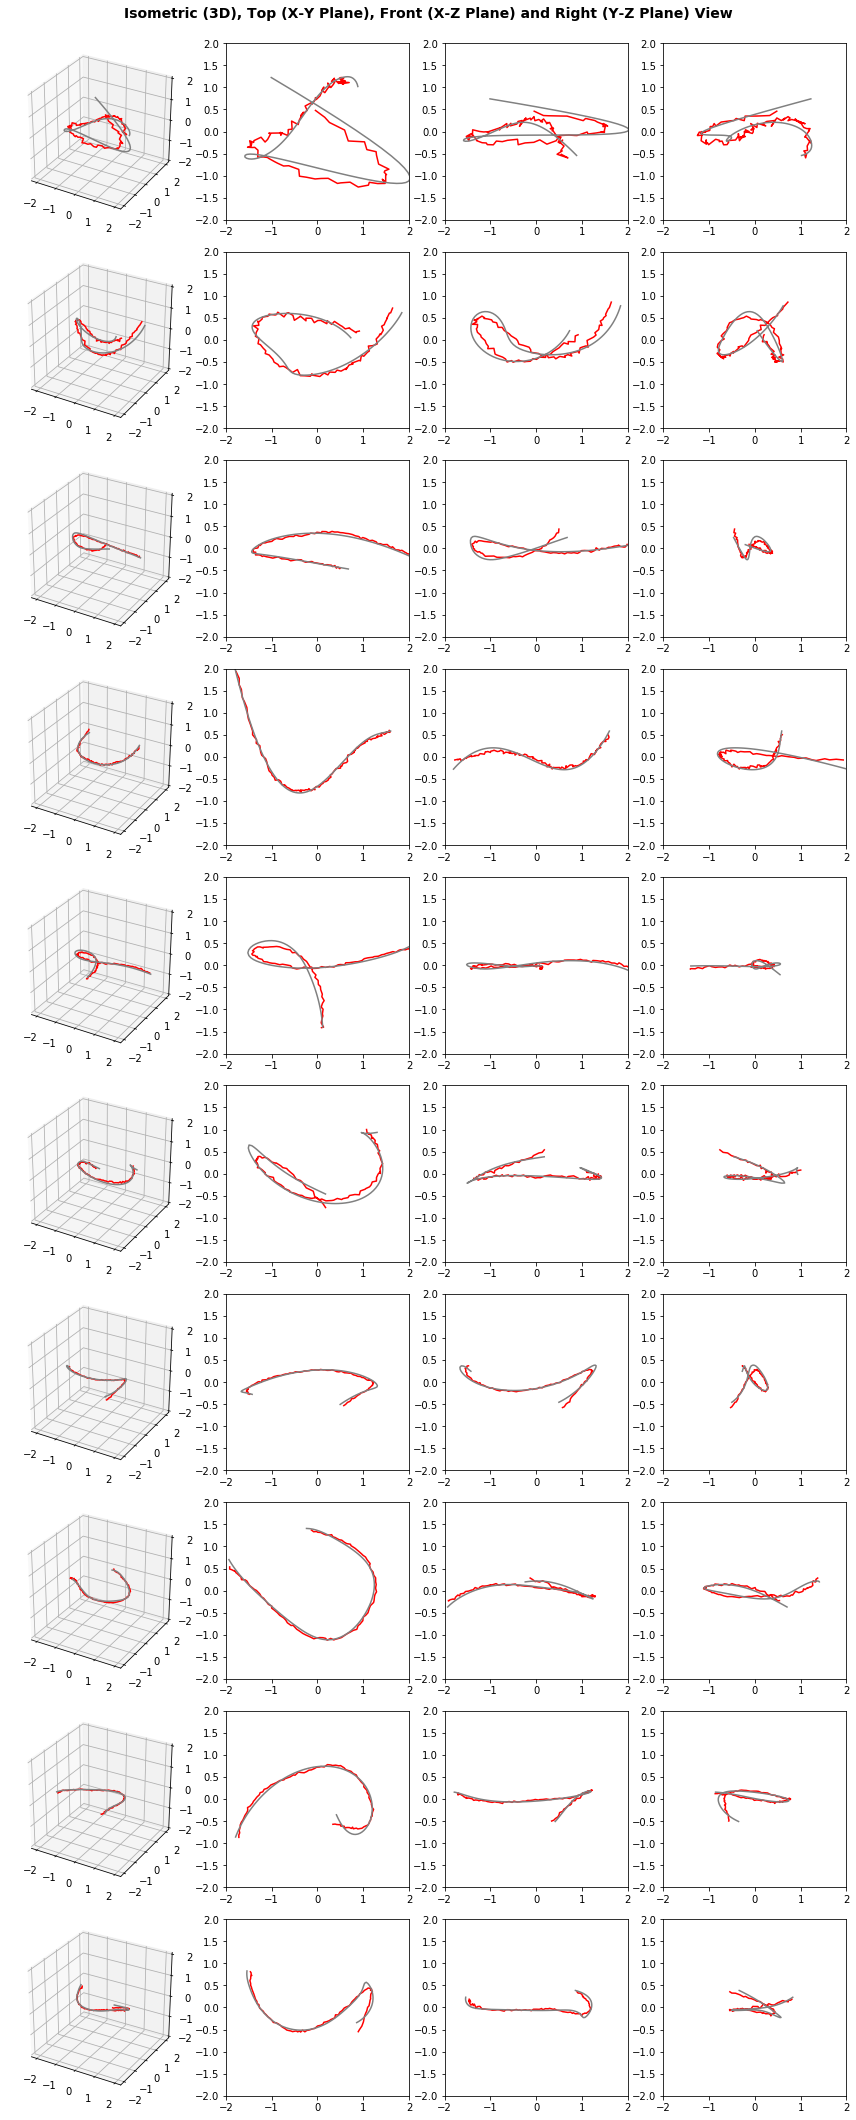

In [0]:
def autoEncoderZ30():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(100, activation='relu')(x)
    x=Dense(60, activation='relu')(x)
    encoded=Dense(30, activation='relu')(x)

    # Decoding
    x=Dense(60, activation='relu')(encoded)
    x=Dense(100, activation='relu')(x)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderZ30, 10, x_train, x_test, filename='Z30')
visualize_AE(AE, train_data, x_test)

## 2.6 Autoencoder Z=60

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00164: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00185: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00183: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00118: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00120: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00126: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00193: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00186: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00125: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00193: early stopping
[0.0028, 0.0025, 0.0025, 0.0046, 0.0032, 0.0033, 

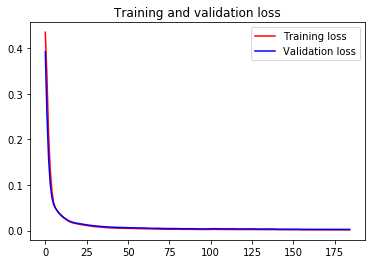

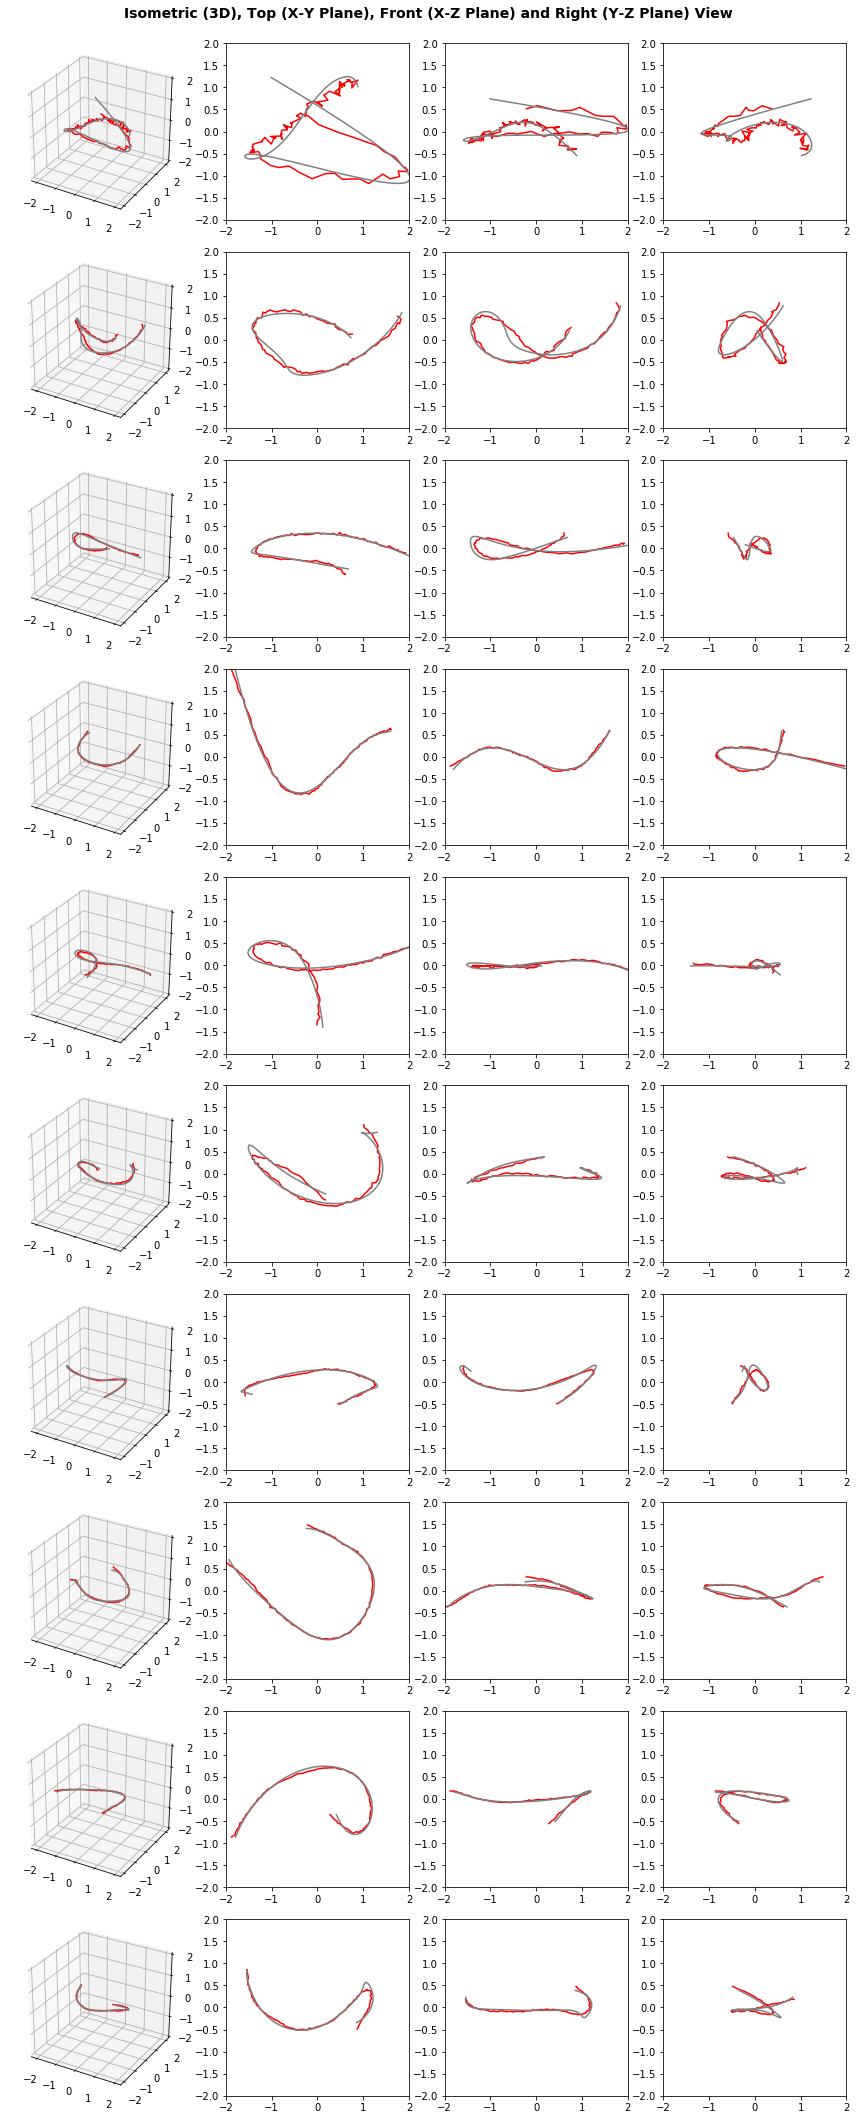

In [0]:
def autoEncoderZ60():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(100, activation='relu')(x)
    encoded=Dense(60, activation='relu')(x)
    #encoded=Dense(10, activation='relu',activity_regularizer=regularizers.l1(10e-5))(x)

    # Decoding
    x=Dense(100, activation='relu')(encoded)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderZ60, 10, x_train, x_test, filename='Z60')
visualize_AE(AE, train_data, x_test)

## 2.7 AutoEncoder Z=300

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00089: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00108: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00112: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00147: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00129: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00163: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00120: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00121: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00096: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00130: early stopping
[0.0026, 0.0021, 0.0028, 0.0021, 0.0019, 0.0023, 

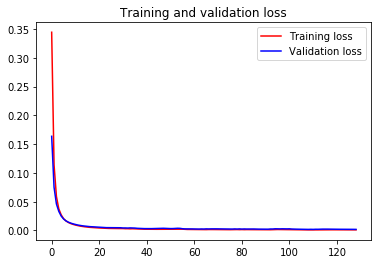

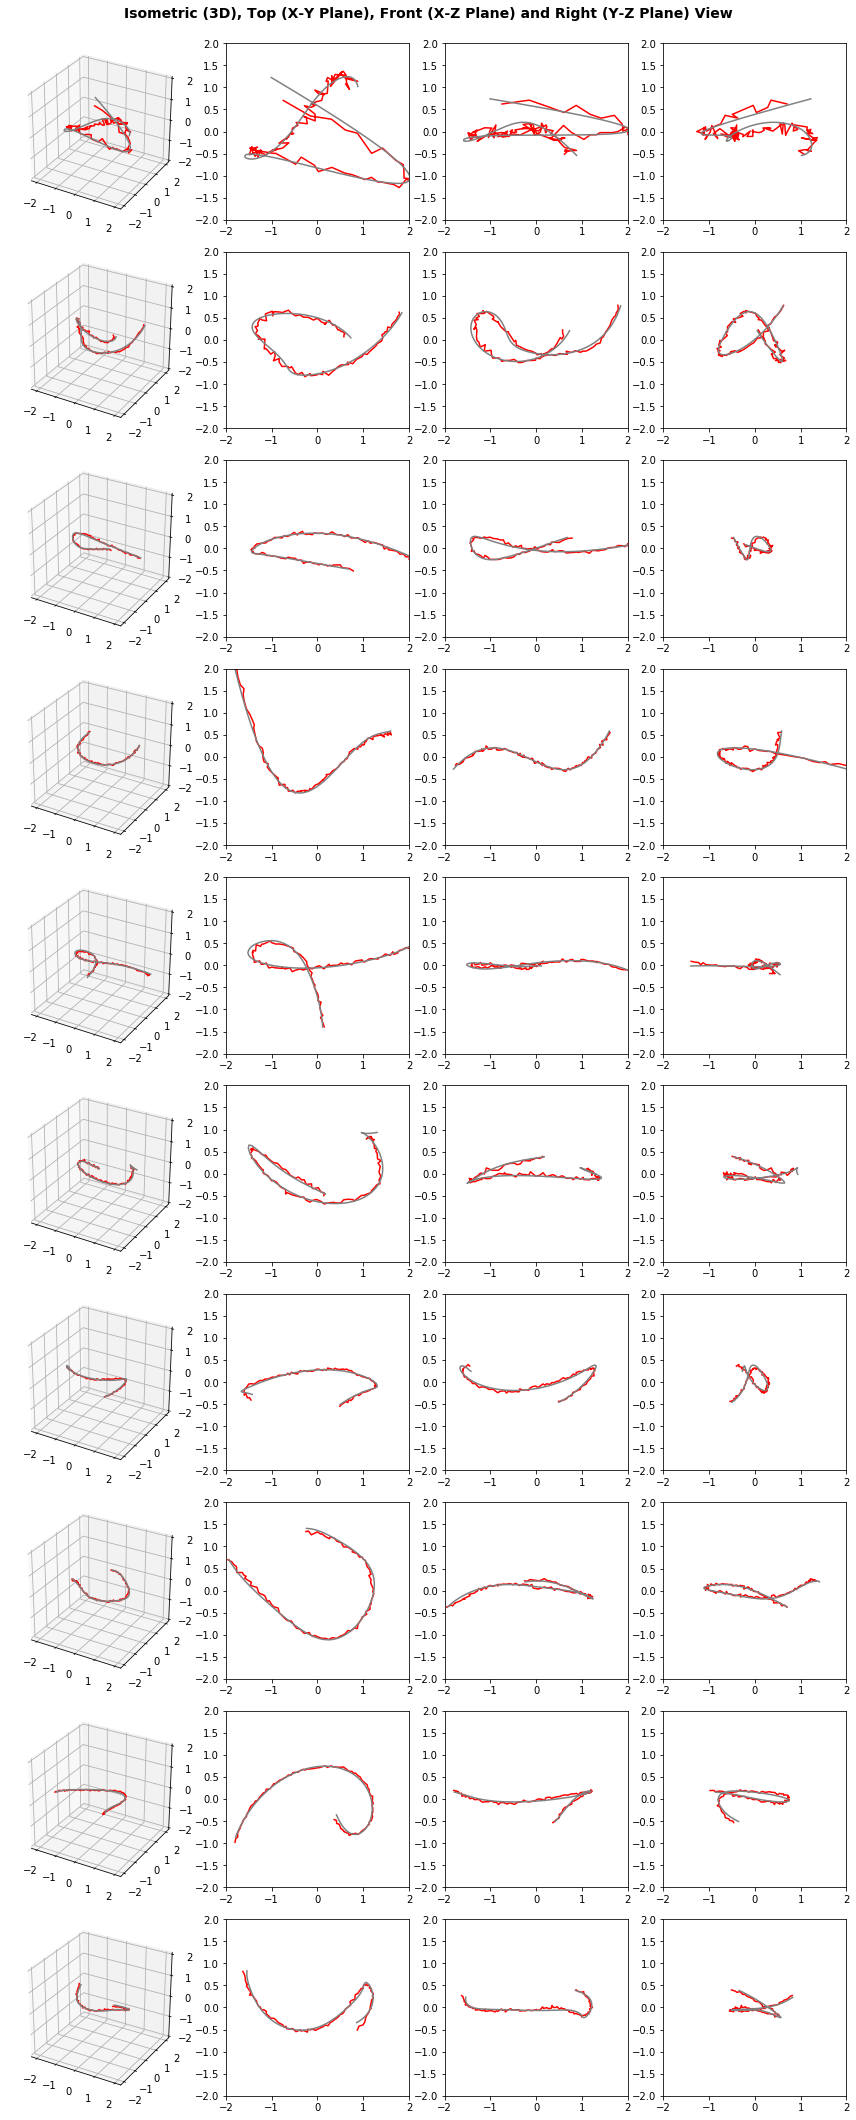

In [0]:
def autoEncoderZ300():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(300, activation='relu')(x)
    encoded=Dense(300, activation='relu')(x)
    #encoded=Dense(10, activation='relu',activity_regularizer=regularizers.l1(10e-5))(x)

    # Decoding
    x=Dense(300)(encoded)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderZ300, 10, x_train, x_test, filename='Z300')
visualize_AE(AE, train_data, x_test)

# 3. Effect of Regularization

Regularizing the bottleneck layer enforces the z-space to be better behaved i.e. the output range is smaller. This leads to 'reduced activity' in z-space and the model generalizes better and avoids overfitting. However, the validation loss for each model increases by increasing regularization due to added regularization term in the cost function. Thus, optimal regularization parameter needs to be emperically explored.

We use l1 regularizer scaled by a constant factor $\lambda=10^{-7}$ in our implementation.

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00367: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00163: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00182: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00263: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00130: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00098: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00275: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00099: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00230: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00144: early stopping
[0.0414, 0.062, 0.0547, 0.0508, 0.0573, 0.0556, 0

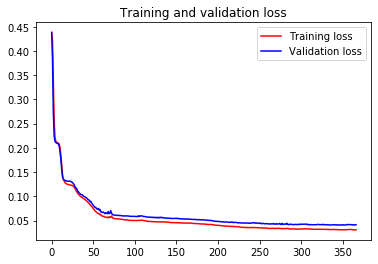

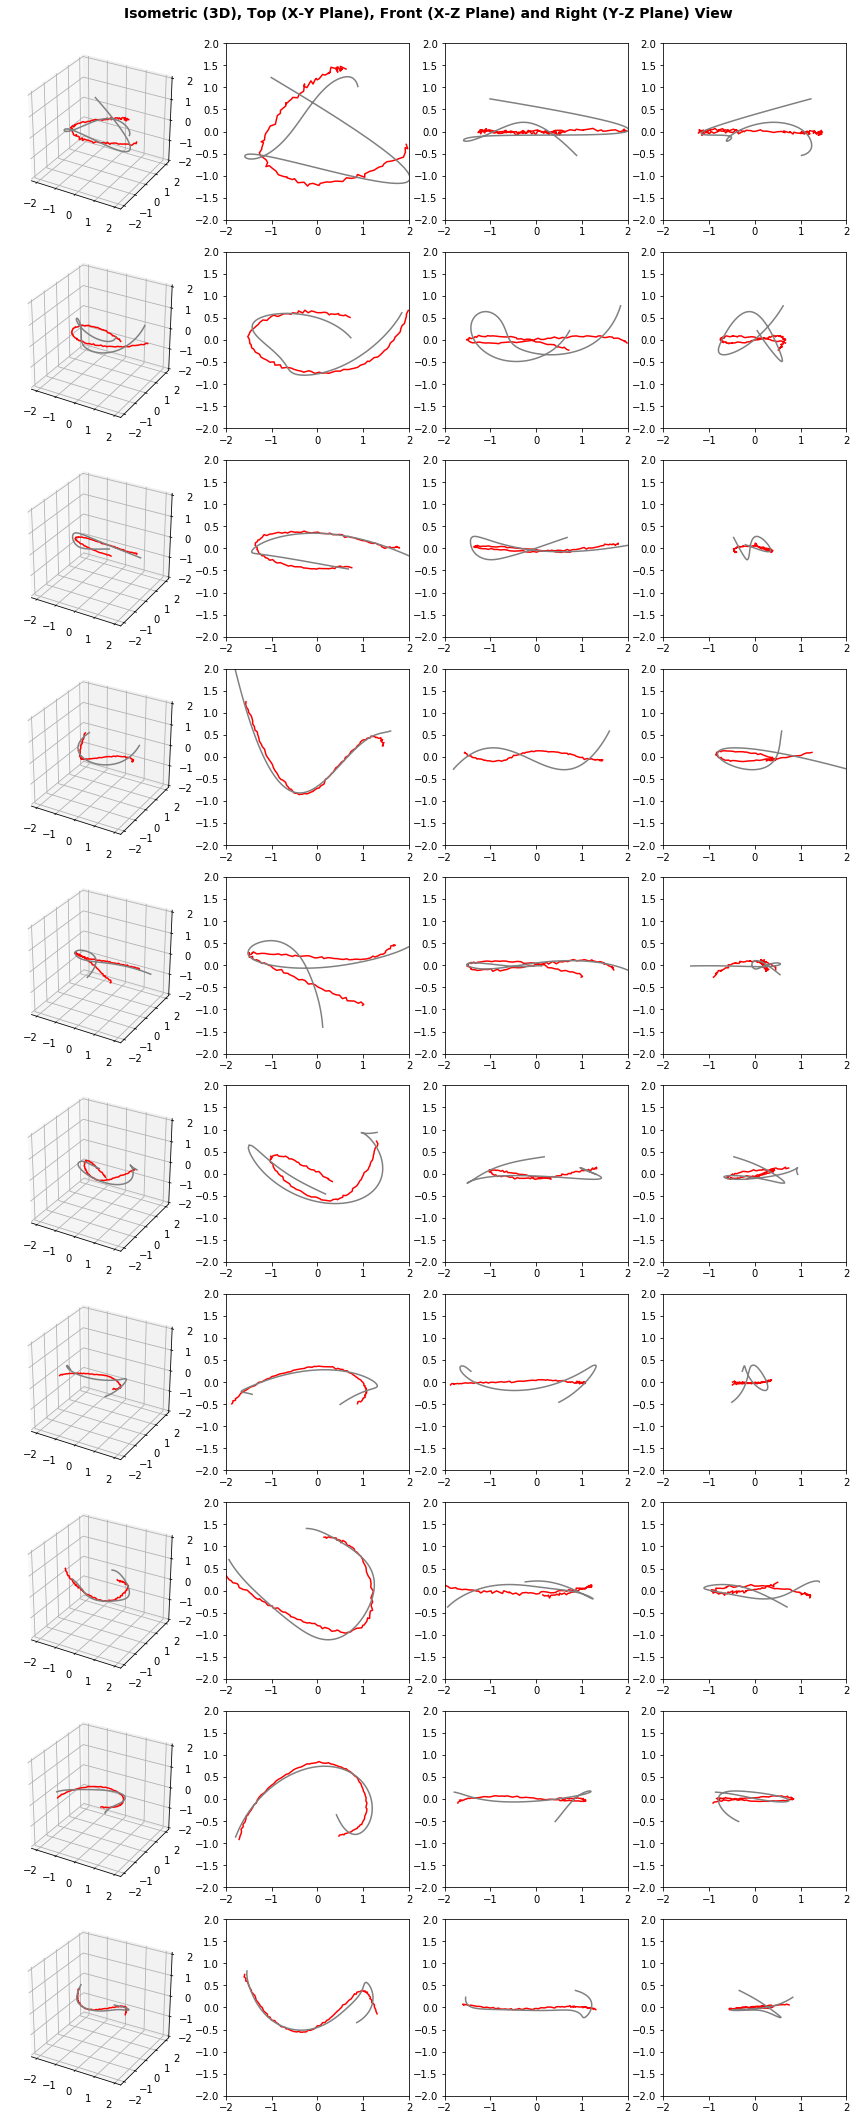

In [0]:
def autoEncoderRZ3():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(100, activation='relu')(x)
    x=Dense(30, activation='relu')(x)
    x=Dense(20, activation='relu')(x)
    x=Dense(10, activation='relu')(x)
    encoded=Dense(3, activation='relu',activity_regularizer=regularizers.l1(10e-7))(x)

    # Decoding
    x=Dense(10, activation='relu')(encoded)
    x=Dense(20, activation='relu')(x)
    x=Dense(30, activation='relu')(x)
    x=Dense(100, activation='relu')(x)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)


    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderRZ3, 10, x_train, x_test, filename='RZ3')
visualize_AE(AE, train_data, x_test)

In [0]:
# Load Autoencoder model with Z=3
def loadAE(filename, bottleneckIndex):
  path=os.path.join('models',filename)
  AE = load_model(path)
  E = Model(AE.input, AE.layers[6].output)
  E.summary()

  return AE, E

def plotZspace(E, x_train, x_test):
    # Calculate z space descriptors
    z_train = E.predict(x_train)
    z_test = E.predict(x_test)
    
    fig = plt.figure(figsize=3/2*plt.figaspect(1/2))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter(z_train[:,0],z_train[:,1],z_train[:,2])
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter(z_test[:,0],z_test[:,1],z_test[:,2])

    plt.tight_layout()
    plt.show()

    print('Mean train activation: '+str(z_train.mean()))
    print('Mean train activation: '+str(z_test.mean()))


Model: "model_316"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_91 (InputLayer)        (None, 100, 3)            0         
_________________________________________________________________
flatten_91 (Flatten)         (None, 300)               0         
_________________________________________________________________
dense_583 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_584 (Dense)            (None, 30)                3030      
_________________________________________________________________
dense_585 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_586 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_587 (Dense)            (None, 3)                 33

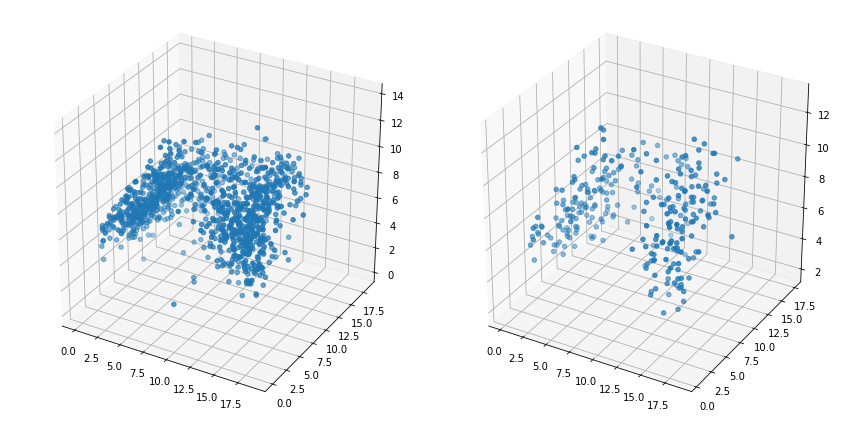

Mean train activation: 7.8731837
Mean train activation: 7.99982


In [0]:
AE_Z3,E_Z3=loadAE('AE_Z3_val_loss_0.0393.h5',6)
plotZspace(E_Z3, x_train, x_test)

Model: "model_318"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_147 (InputLayer)       (None, 100, 3)            0         
_________________________________________________________________
flatten_147 (Flatten)        (None, 300)               0         
_________________________________________________________________
dense_933 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_934 (Dense)            (None, 30)                3030      
_________________________________________________________________
dense_935 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_936 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_937 (Dense)            (None, 3)                 33

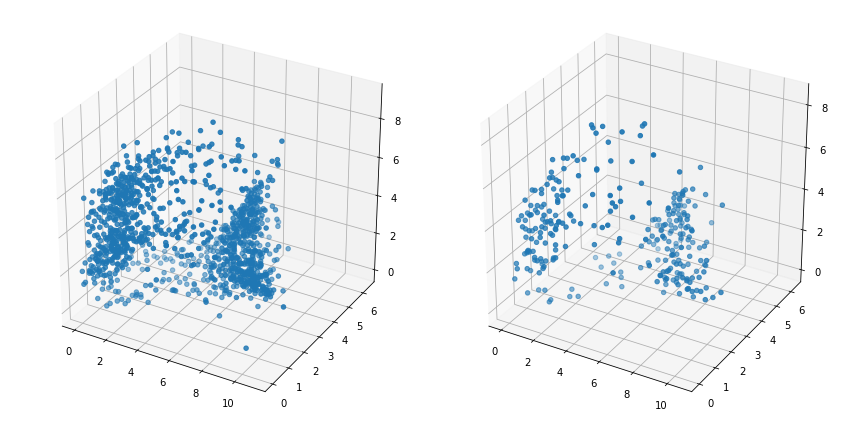

Mean train activation: 3.3989334
Mean train activation: 3.4010444


In [0]:
AE_RZ3,E_RZ3=loadAE('AE_RZ3_val_loss_0.0414.h5',6)
plotZspace(E_RZ3, x_train, x_test)

# 4. Effect of Deep AutoEncoders

As the depth of an autoencoder increases, it can capture more complex relationships in the data. 

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00208: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00149: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00228: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00208: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00184: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00204: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00166: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00123: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00116: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00133: early stopping
[0.0222, 0.0254, 0.0252, 0.0219, 0.0205, 0.0248, 

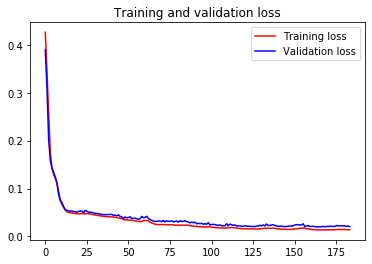

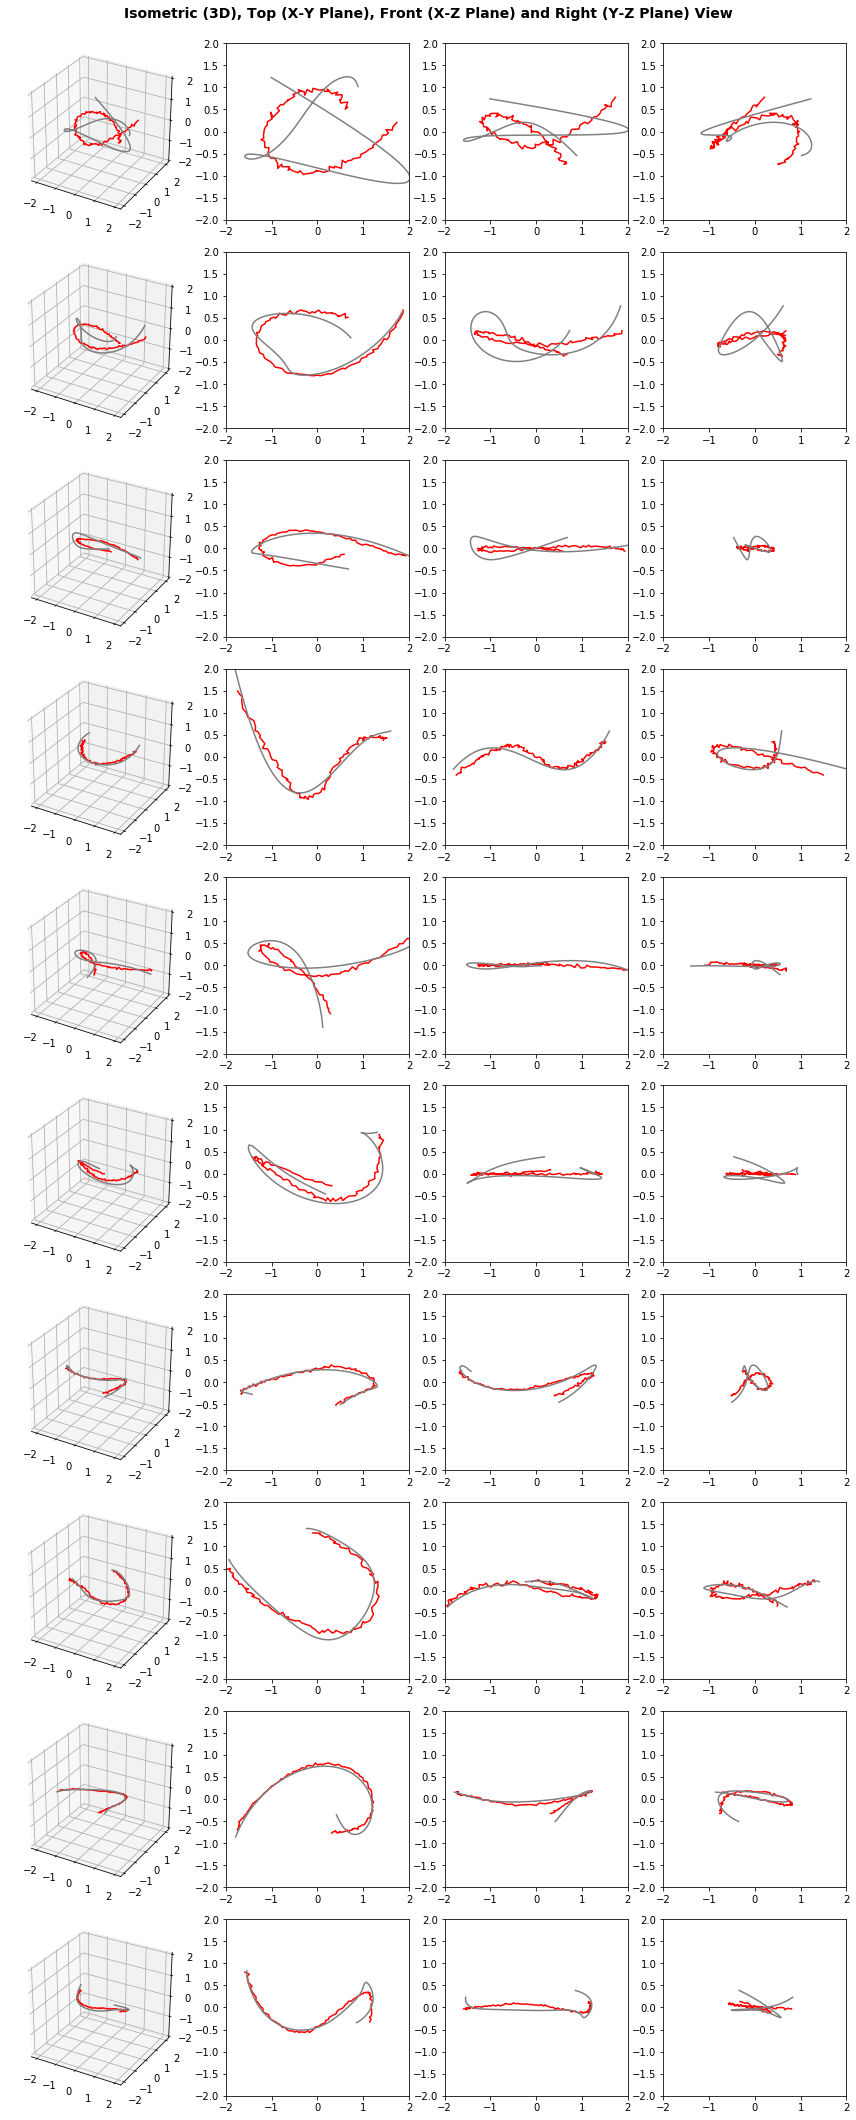

In [0]:
def autoEncoderRZ30_Deep():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(150, activation='relu')(x)
    x=Dense(100, activation='relu')(x)
    x=Dense(80, activation='relu')(x)
    x=Dense(60, activation='relu')(x)
    x=Dense(40, activation='relu')(x)
    encoded=Dense(30, activation='relu',activity_regularizer=regularizers.l1(10e-7))(x)

    # Decoding
    x=Dense(40, activation='relu')(encoded)
    x=Dense(60, activation='relu')(x)
    x=Dense(80, activation='relu')(x)
    x=Dense(100, activation='relu')(x)
    x=Dense(150, activation='relu')(x)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderRZ30_Deep, 10, x_train, x_test, filename='RZ30_Deep')
visualize_AE(AE, train_data, x_test)

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00159: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00138: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00156: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00156: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00117: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00086: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00154: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00120: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00146: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00180: early stopping
[0.021, 0.0203, 0.019, 0.0226, 0.026, 0.0271, 0.0

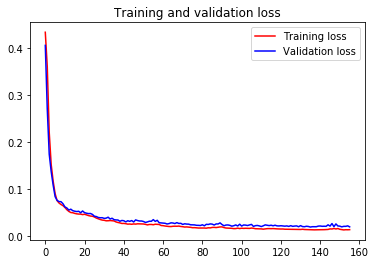

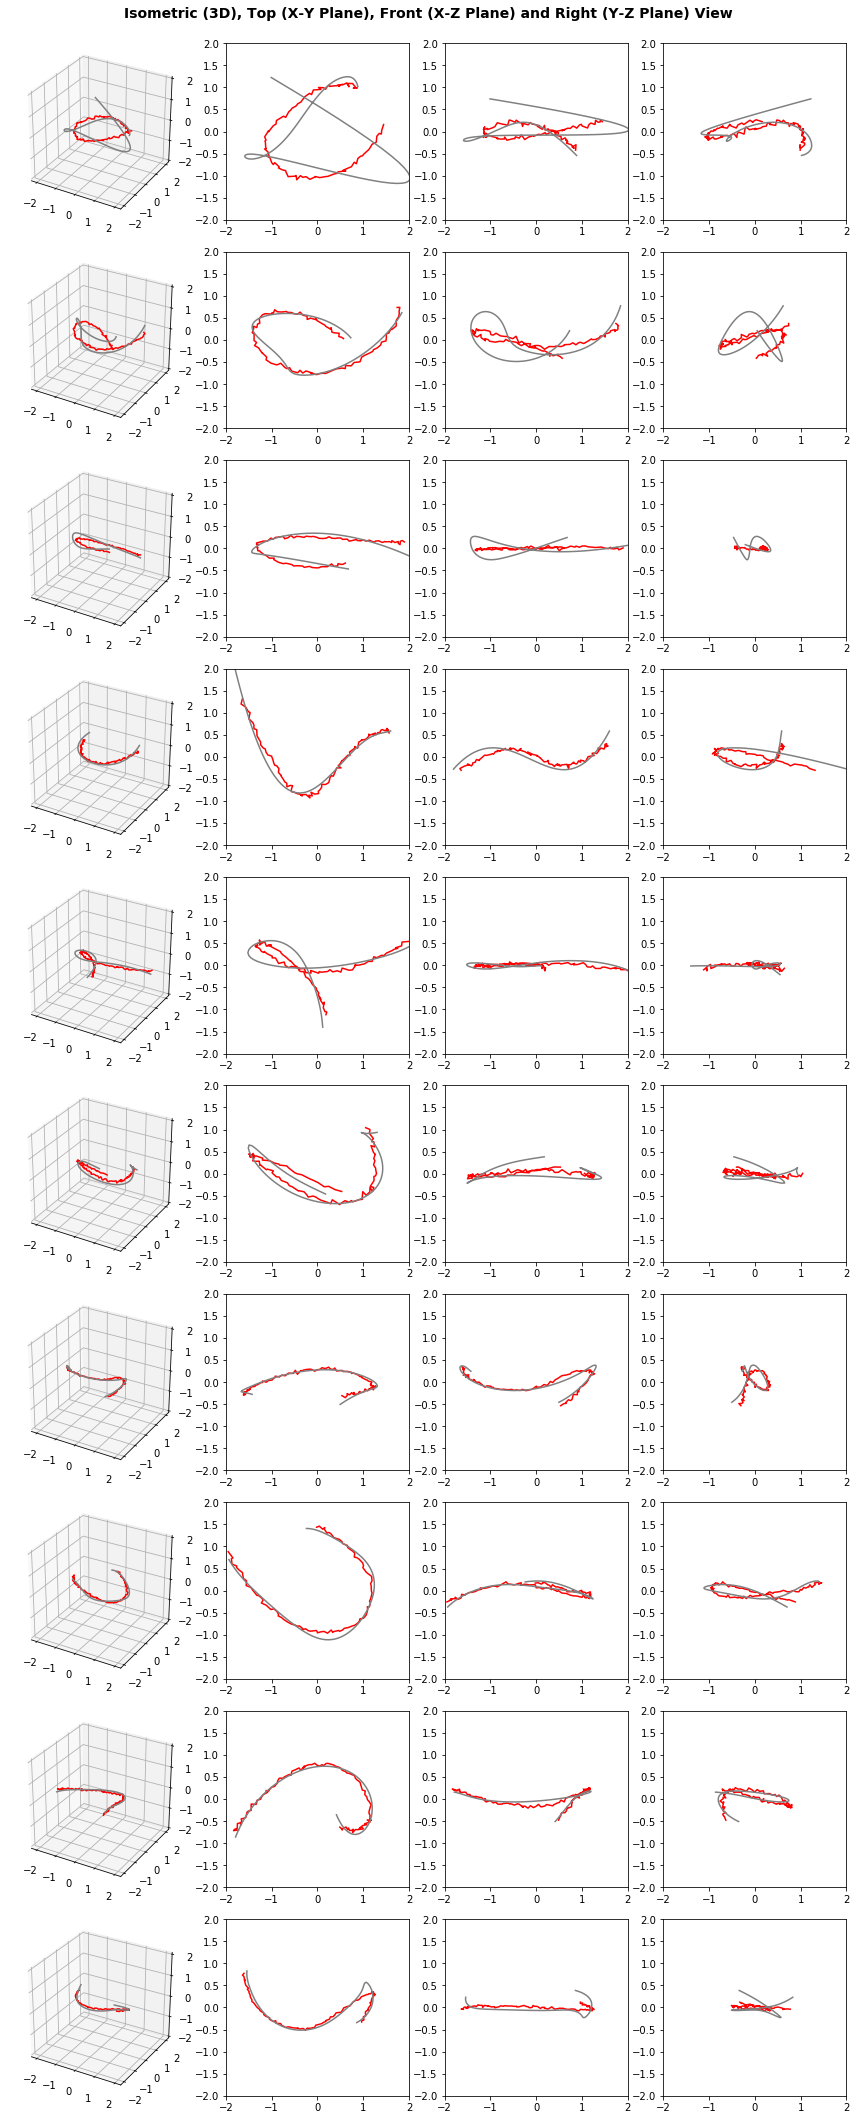

In [0]:
def autoEncoderZ30_Deep():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(150, activation='relu')(x)
    x=Dense(100, activation='relu')(x)
    x=Dense(80, activation='relu')(x)
    x=Dense(60, activation='relu')(x)
    x=Dense(40, activation='relu')(x)
    encoded=Dense(30, activation='relu')(x)

    # Decoding
    x=Dense(40, activation='relu')(encoded)
    x=Dense(60, activation='relu')(x)
    x=Dense(80, activation='relu')(x)
    x=Dense(100, activation='relu')(x)
    x=Dense(150, activation='relu')(x)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderZ30_Deep, 10, x_train, x_test, filename='Z30_Deep')
visualize_AE(AE, train_data, x_test)

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00202: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00176: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00157: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00120: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00146: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00168: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00218: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00228: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00182: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00115: early stopping
[0.0059, 0.0062, 0.0061, 0.0067, 0.0059, 0.0055, 

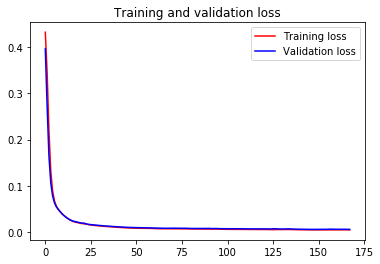

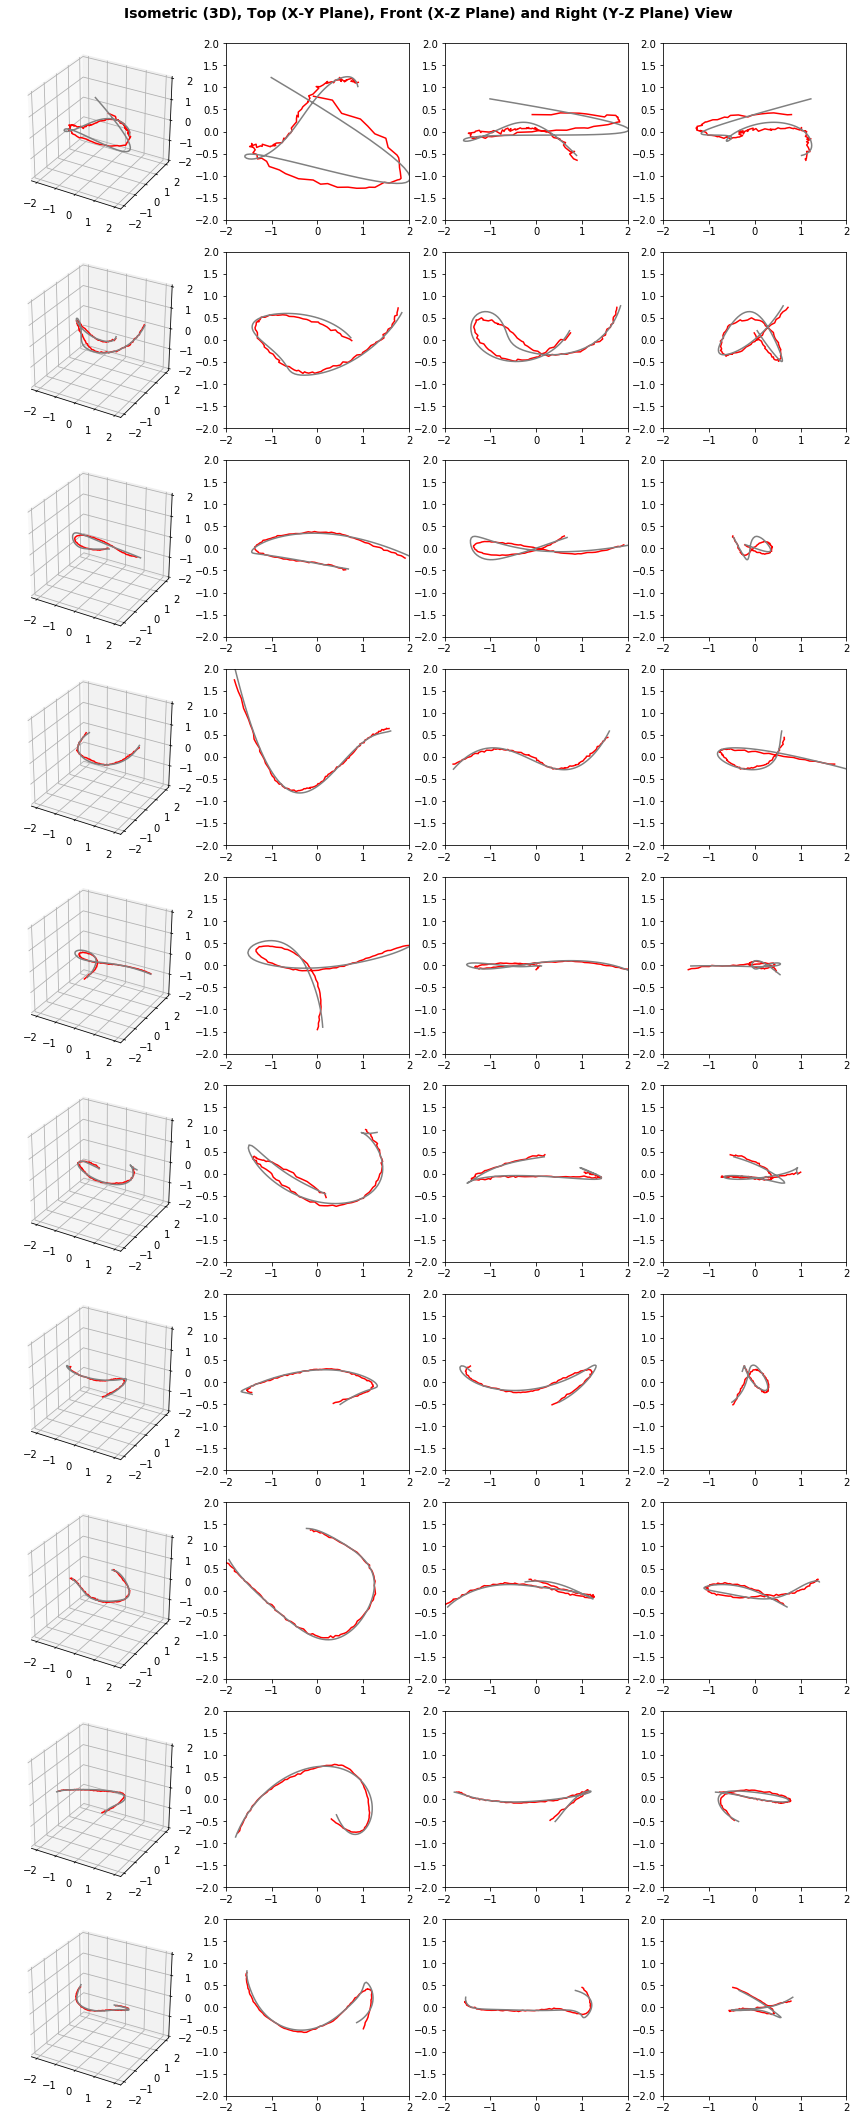

In [0]:
def autoEncoderRZ30_Shallow():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(100, activation='relu')(x)
    encoded=Dense(30, activation='relu',activity_regularizer=regularizers.l1(10e-7))(x)

    # Decoding
    x=Dense(100, activation='relu')(encoded)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderRZ30_Shallow, 10, x_train, x_test, filename='RZ30_Shallow')
visualize_AE(AE, train_data, x_test)

Model no. 1
Restoring model weights from the end of the best epoch
Epoch 00156: early stopping
Model no. 2
Restoring model weights from the end of the best epoch
Epoch 00280: early stopping
Model no. 3
Restoring model weights from the end of the best epoch
Epoch 00148: early stopping
Model no. 4
Restoring model weights from the end of the best epoch
Epoch 00188: early stopping
Model no. 5
Restoring model weights from the end of the best epoch
Epoch 00160: early stopping
Model no. 6
Restoring model weights from the end of the best epoch
Epoch 00167: early stopping
Model no. 7
Restoring model weights from the end of the best epoch
Epoch 00248: early stopping
Model no. 8
Restoring model weights from the end of the best epoch
Epoch 00198: early stopping
Model no. 9
Restoring model weights from the end of the best epoch
Epoch 00172: early stopping
Model no. 10
Restoring model weights from the end of the best epoch
Epoch 00132: early stopping
[0.0025, 0.0024, 0.0034, 0.0029, 0.0032, 0.0031, 

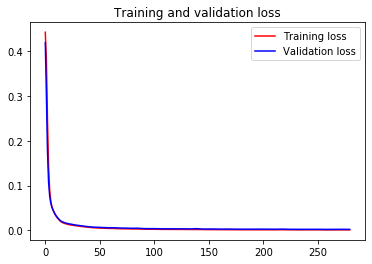

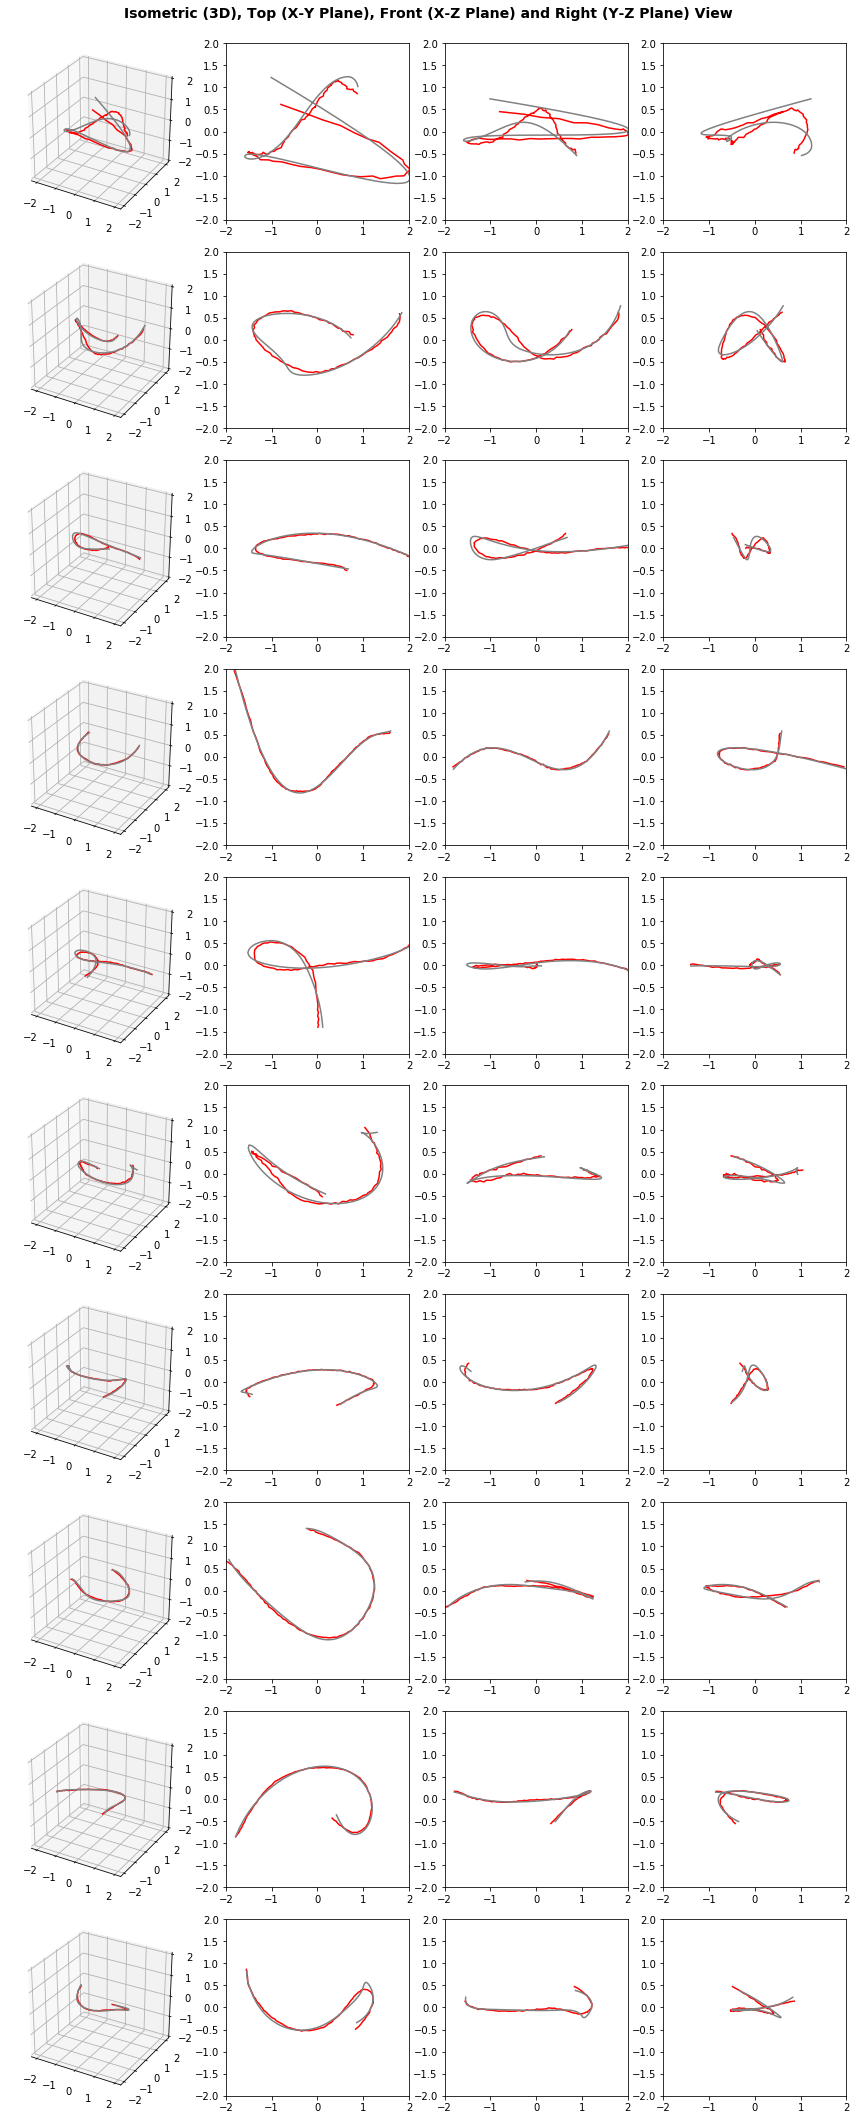

In [0]:
def autoEncoderZ30_Shallow():
    inp_curve=Input(shape=(100,3,))

    # Encoding
    x=Flatten()(inp_curve)
    x=Dense(100, activation='relu')(x)
    encoded=Dense(30, activation='relu')(x)

    # Decoding
    x=Dense(100, activation='relu')(encoded)
    x=Dense(300)(x)
    decoded=Reshape((100, 3))(x)

    autoencoder = Model(inp_curve, decoded)
    encoder = Model(inp_curve, encoded)
    
    return autoencoder, encoder

#resetRNG(0)
AE,E,train_data =AE_analysis(autoEncoderZ30_Shallow, 10, x_train, x_test, filename='Z30_Shallow')
visualize_AE(AE, train_data, x_test)

# Observations

In this section, we recap the Validation losses observed in learning using different Autoencoder architectures.

### 1. Effect of activation layer
| Activation Function | Mean Validation Loss | Best Validation Loss |
|:-------------------:|:--------------------:|:--------------------:|
| Sigmoid             | 0.0067               | 0.0053
| RELU                | 0.0022               | 0.0015
| LeakyRELU           | 0.0053               | 0.0040

It is intresting to note that the Sigmoid function takes longer to train and runs for significantly more epochs (440 epochs) before converging when compared to relu

### 2. Effect of z-space dimension
| Z-Space Dimension   | Mean Validation Loss | Best Validation Loss |
|:-------------------:|:--------------------:|:--------------------:|
| 2                   | 0.1232               | 0.0610
| 3                   | 0.0531               | 0.0393
| 10                  | 0.0187               | 0.0154
| 15                  | 0.0133               | 0.0107
| 30                  | 0.0059               | 0.0051
| 60                  | 0.0031               | 0.0025
| 300                 | 0.0023               | 0.0019

Reconstruction losses for Z=2,3,10,15 are significant. However, we don't observe a lot of improvement in reconstructed results after Z=30. Thus, exploring architectures with Z=30 seems to be the sweet spot. This is in agreement with our intuition since these paths are created by 5ss mechanisms which are defined using 33 parameters.

### 3. Effect of regularization
| Model Type          | Mean Validation Loss | Best Validation Loss |
|:-------------------:|:--------------------:|:--------------------:|
| z=3 Regularized     | 0.0535               | 0.0414
| z=3 Unregularized   | 0.0531               | 0.0393

Although regularization increase the validation loss, it imparts desirable qualities to the z-space parameters.

### 4. Effect of depth
| Model Type          | Mean Validation Loss | Best Validation Loss |
|:-------------------:|:--------------------:|:--------------------:|
| z=30 Reg Deep       | 0.0244               | 0.0205
| z=30 Unreg Deep     | 0.0216               | 0.0190
| z=30 Reg Shallow    | 0.0061               | 0.0055
| z=30 Unreg Shallow  | 0.0011               | 0.0024

These results are unexpected. It is observed that the autoencoder performs better when it is shallow and worse when it is deep. Needs further investigation. Might be due to the use of RELU activation on data normalized to roughly -3.5 and 3.5 range.